In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore,boxcox
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,classification_report,accuracy_score

In [5]:
df=pd.read_csv(r"C:\Users\user\Downloads\Micro-Credit-Project--1-\Micro Credit Project\Data file.csv")
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

## Checking nulls

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

No nulls present

We will drop unnamed: 0 as it is just the serial number and nothing else.

In [6]:
df=df.drop(['Unnamed: 0'],axis=1)

## Feature Engineering

In [5]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

All the mobile phone has the same telecom circle.

In [6]:
df['pdate'].value_counts()

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64

In order to analyse date in a better way lets split pdate into 3 features i.e. pyear, pmonth and pday

In [7]:
#pdate
df['pdate']=pd.to_datetime(df['pdate'])
df['pday'] = df['pdate'].dt.day
df['pmonth'] = df['pdate'].dt.month
df['pyear']=df['pdate'].dt.year
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  amnt_loans90  \
0                2.0                0.0              1539  ...            12   
1               20.0                0.0              5787  ...            12   
2                3.0                0.0              1539  ...             6   
3               41.0                0.0               947  ...            12   
4                4.0                0.0              2309  ...            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

       pdate  pday  pmonth  pyear  
0 2016-07-20    20       7   2016  
1 2016-08-10    10       8   2016  
2 2016-08-19    19       8   2016  
3 2016-06-06     6       6   2016  
4 2016-06-22    22       6   2016  

[5 rows x 39 columns]

In [8]:
df['pyear'].value_counts()

2016    209593
Name: pyear, dtype: int64

We can observe that this data is of year 2016 so we dont need pyear column as all the values are same. Similarly all the values of pcircle are same so we can drop this column as well. We will also drop pdate column as we have already splitted it into day month and year.

In [8]:
df=df.drop(['pdate','pyear','pcircle'],axis=1)

In [6]:
df

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pday  \
0                     6                 0.0  29.000000  29.000000    20   
1                    12                 0.0   0.000000   0.000000    10   
2                     6                 0.0   0.000000   0.000000    19   
3                     6                 0.0   0.000000   0.000000     6   
4                     6                 0.0   2.333333   2.333333    22   
...                 ...                 ...        ...        ...   ...   
209588                6                 0.0   1.000000   1.000000    17   
209589                6                 0.0   1.000000   1.000000    12   
209590               12                 0.0   4.000000   3.833333    29   
209591               12                 0.0   0.000000  10.500000    25   
209592               12                 0.0   0.000000   0.000000     7   

        pmonth  
0            7  
1            8  
2            8  
3            6  
4            6  
...        ...  
209588       6  
209589       6  
209590       7  
209591       7  
209592       7  

[209593 rows x 36 columns]

## Analysing relation between features and label

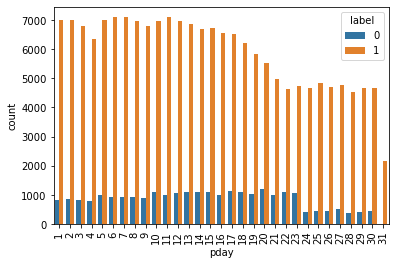

In [8]:
#Plotting count plot for pday
a=sns.countplot(x=df['pday'],hue=df['label'],data=df)
plt.xlabel('pday')
plt.xticks(rotation=90)
plt.show()

We assume that pday means payment date so we can see from the above graph that customers whose payment date is in the starting of the month are the defaulters.

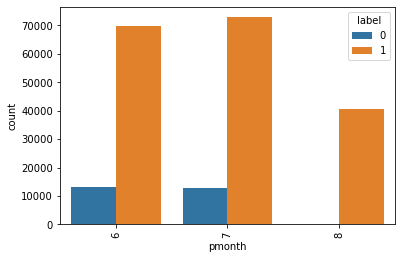

In [9]:
#Plotting count plot for pmonth
a=sns.countplot(x=df['pmonth'],hue=df['label'],data=df)
plt.xlabel('pmonth')
plt.xticks(rotation=90)
plt.show()

This dataset contains information for three months only. If a customer takes a loan in the month of august then there is highest probability of being a defaulter.

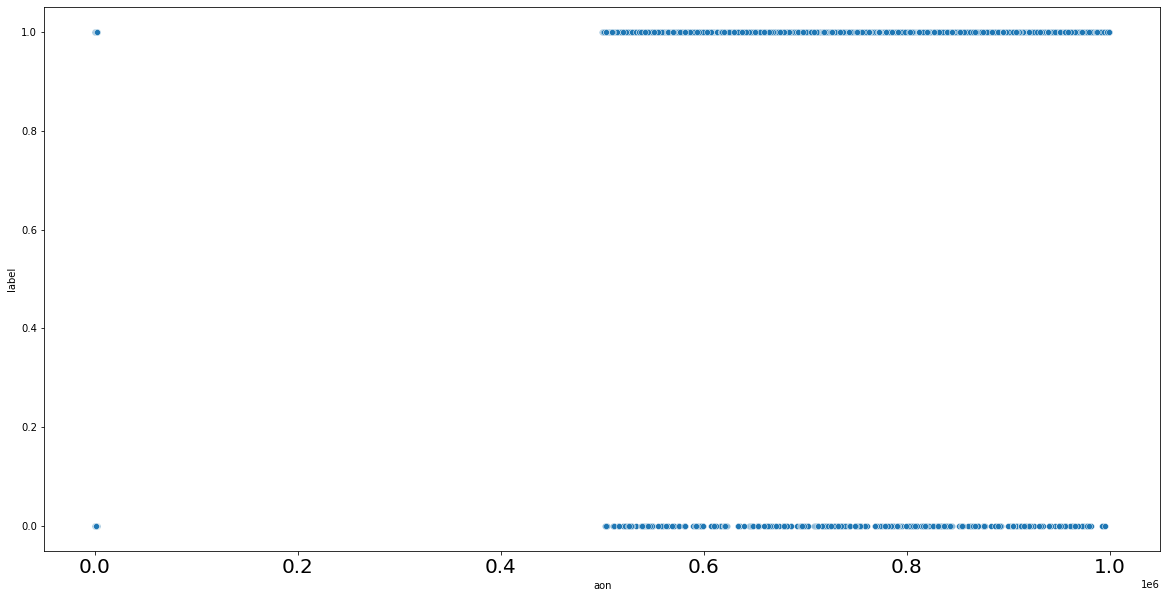

In [18]:
#Plotting count plot for aon
plt.figure(figsize=(20,10))
a=sns.scatterplot(x=df['aon'],y=df['label'],data=df)
plt.xlabel('aon')
plt.xticks(fontsize=20)
plt.show()

Higher the age on network more the chances of being defaulter.

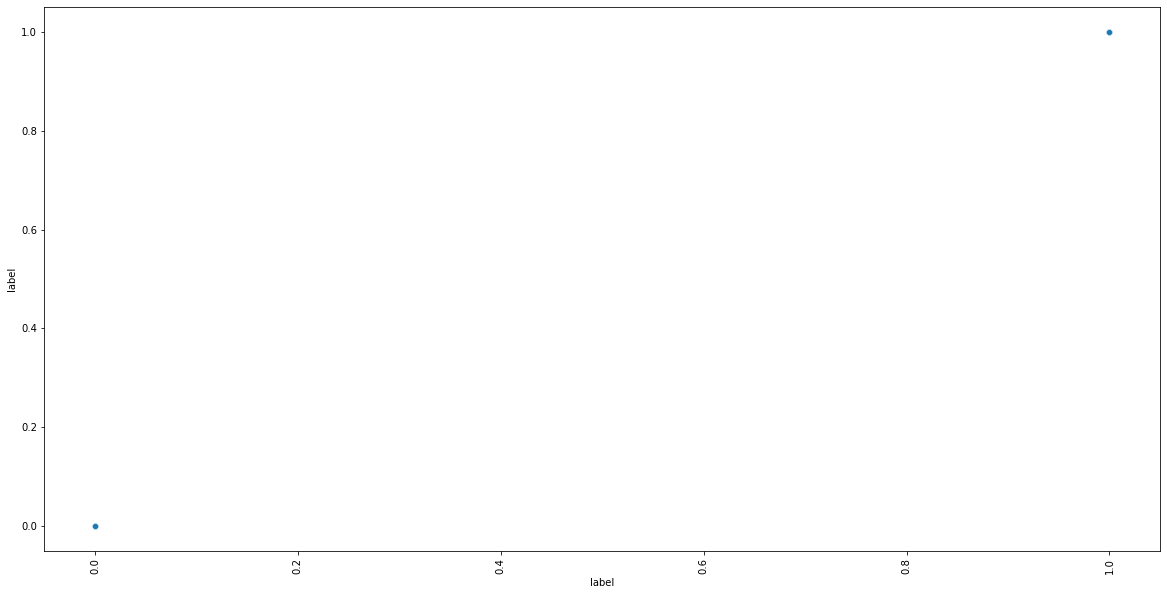

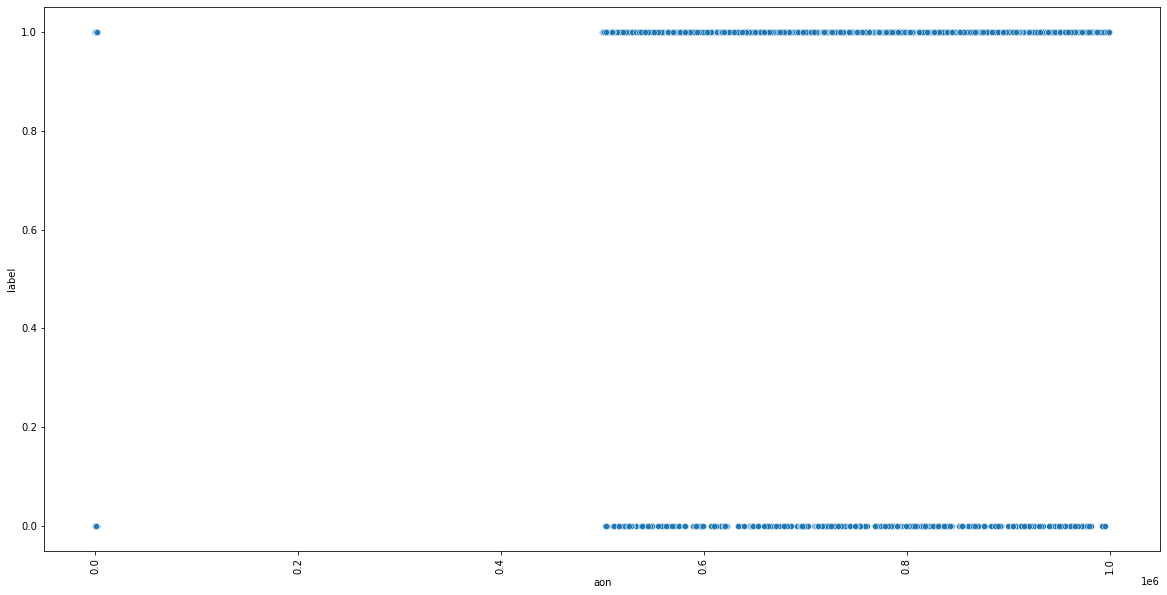

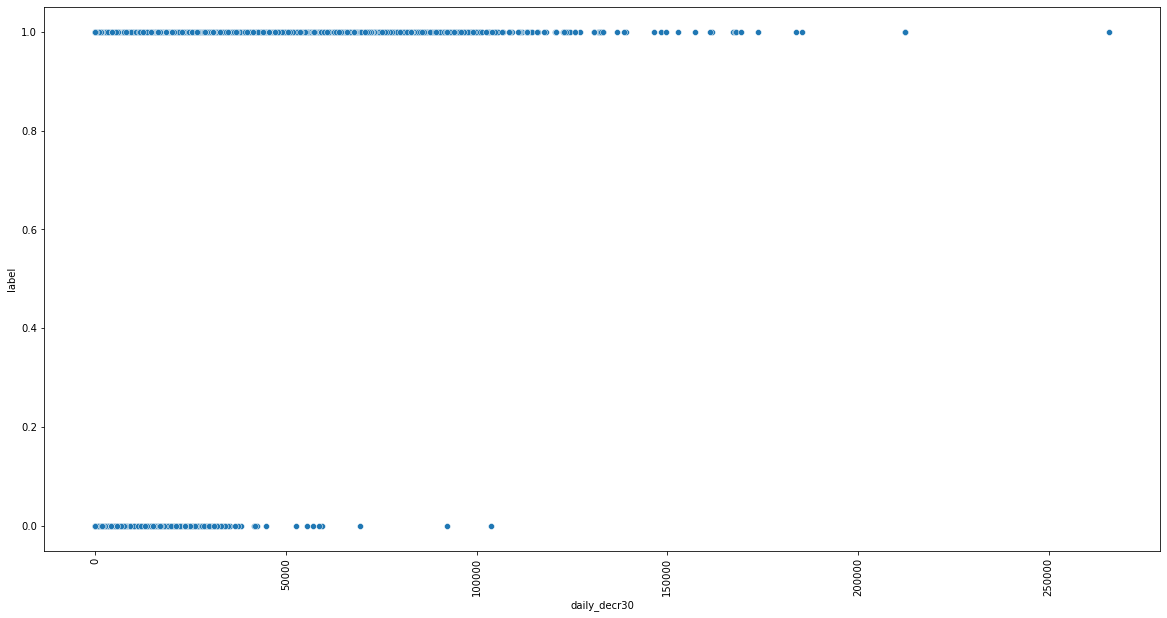

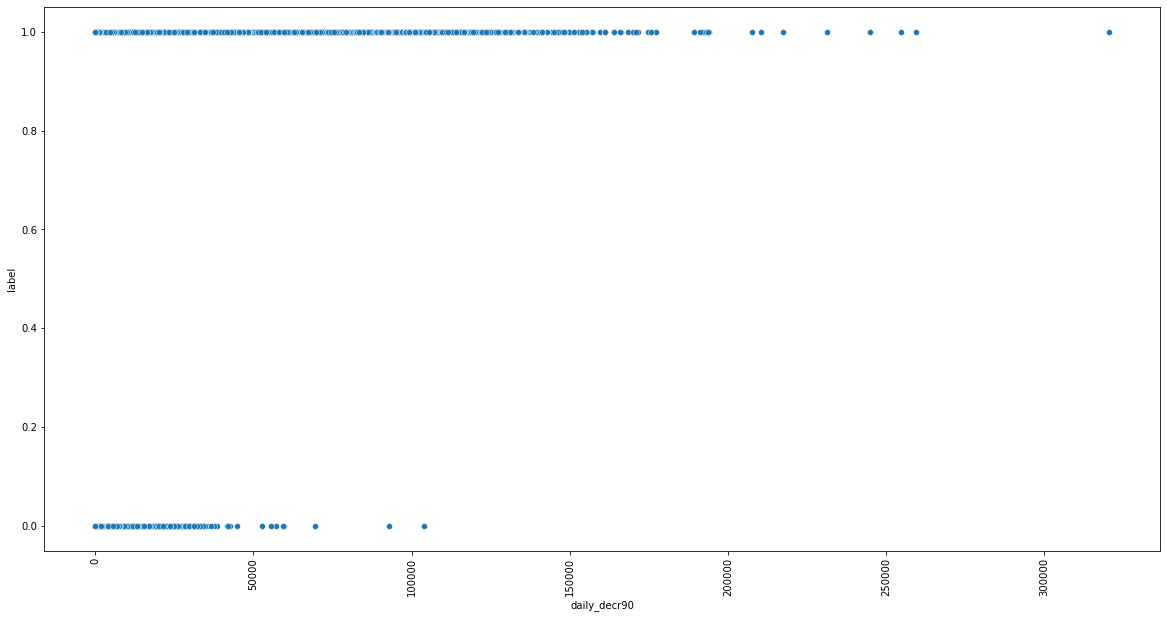

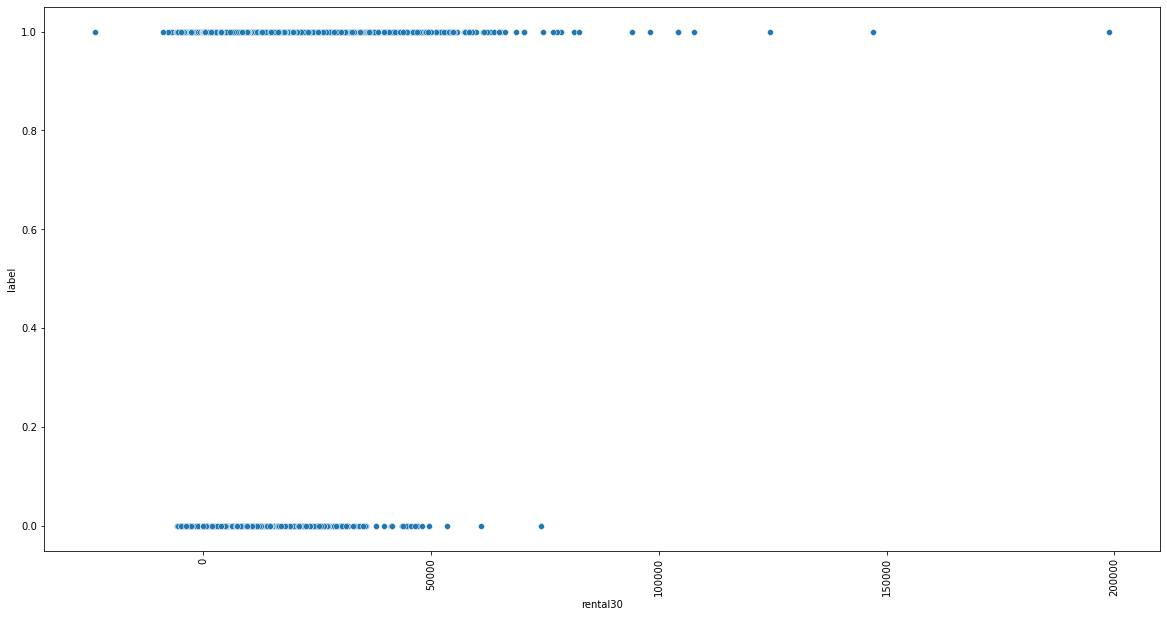

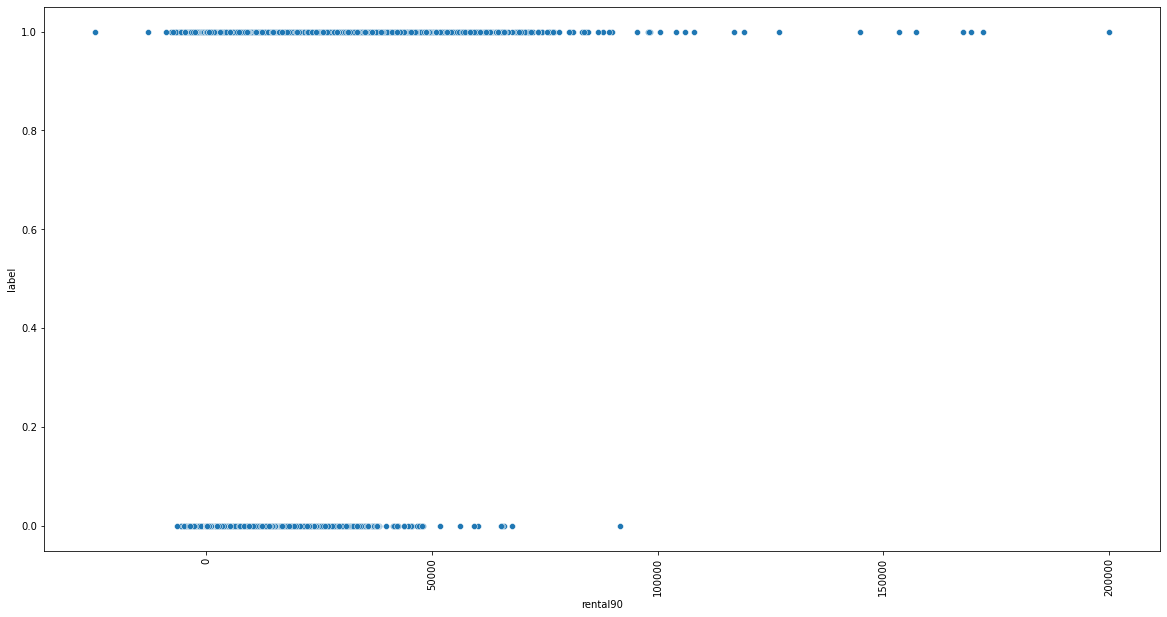

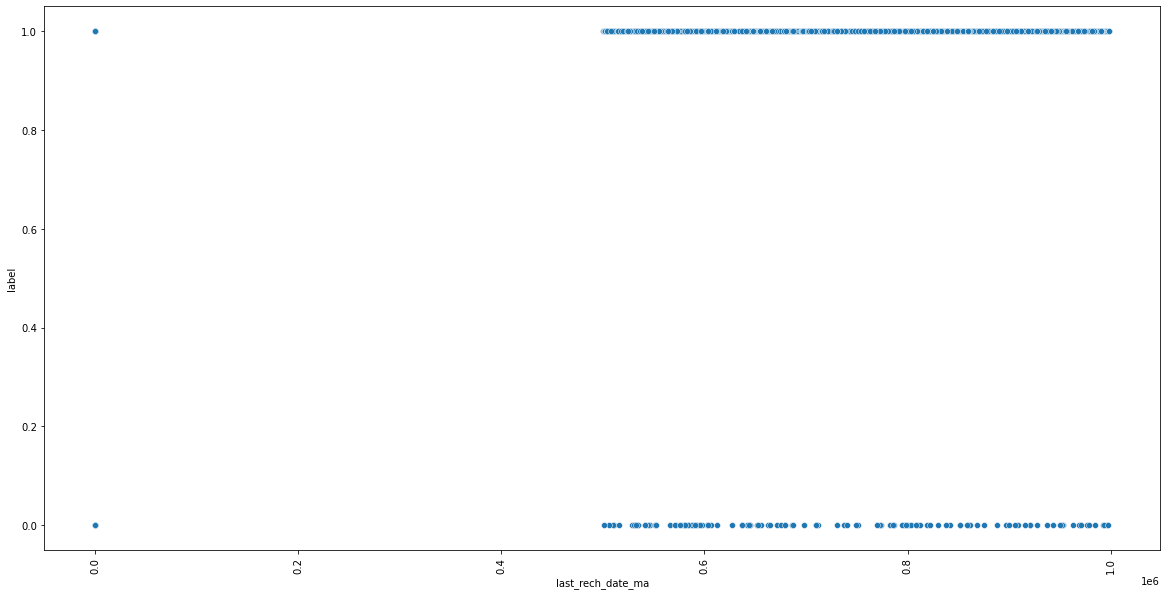

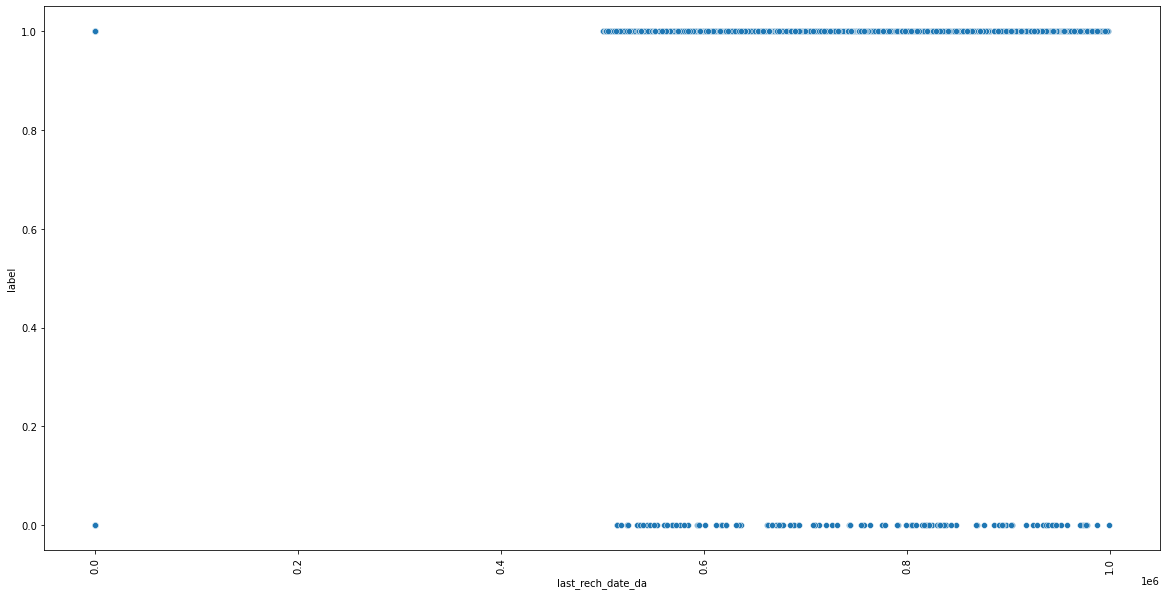

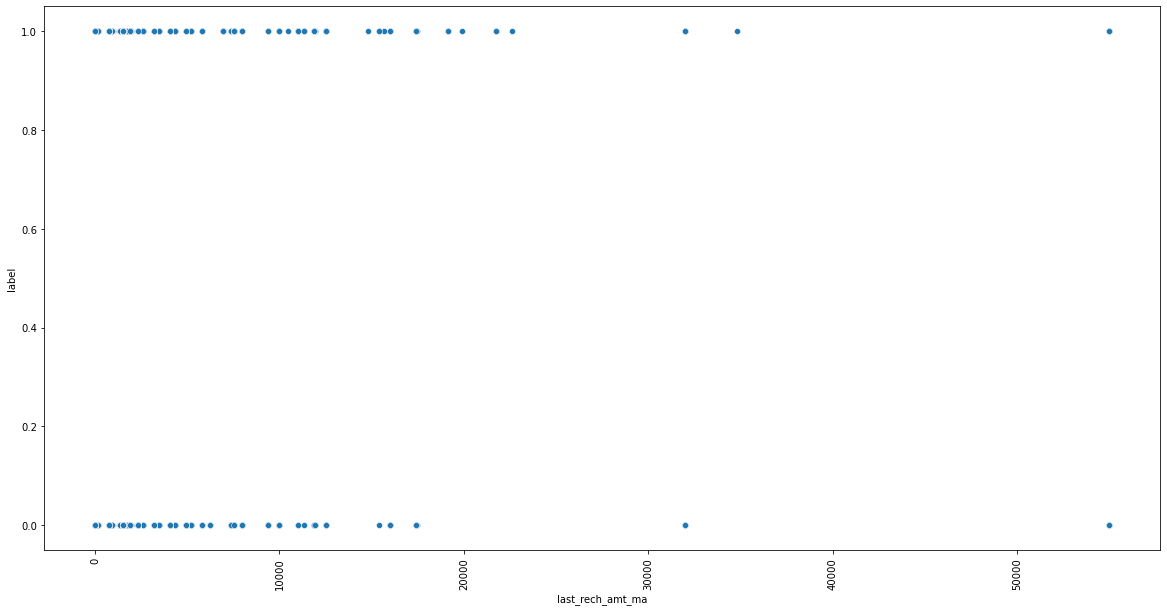

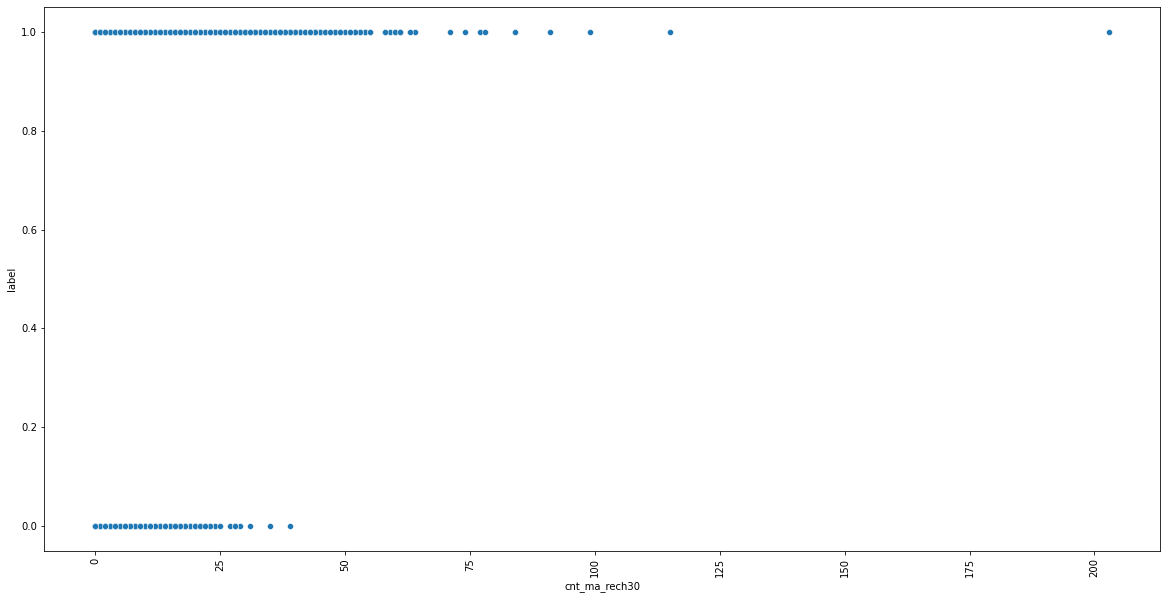

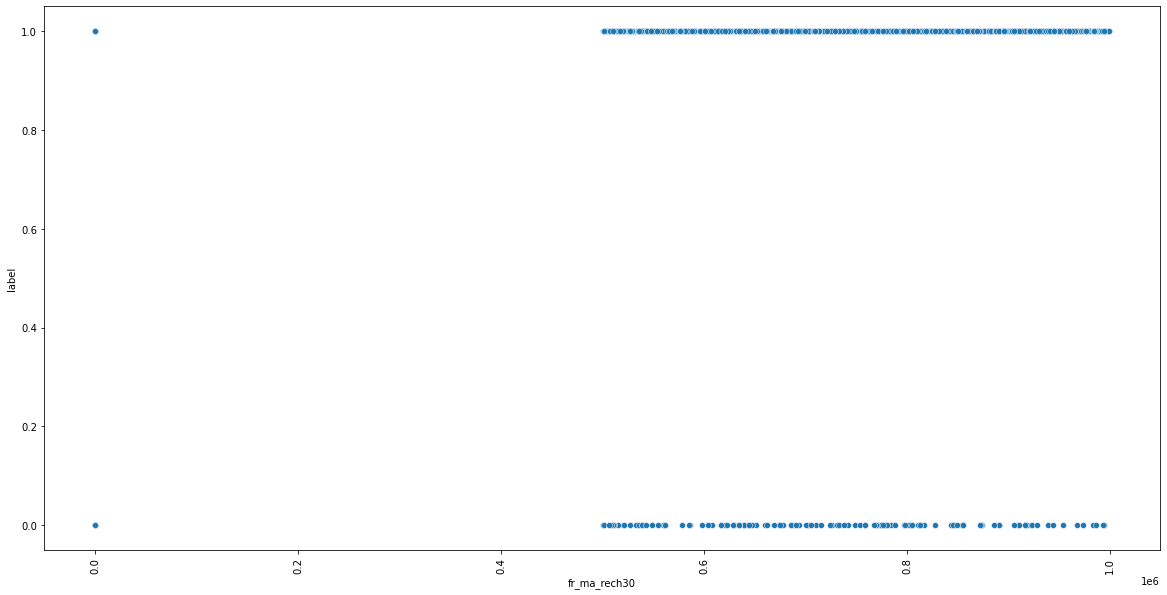

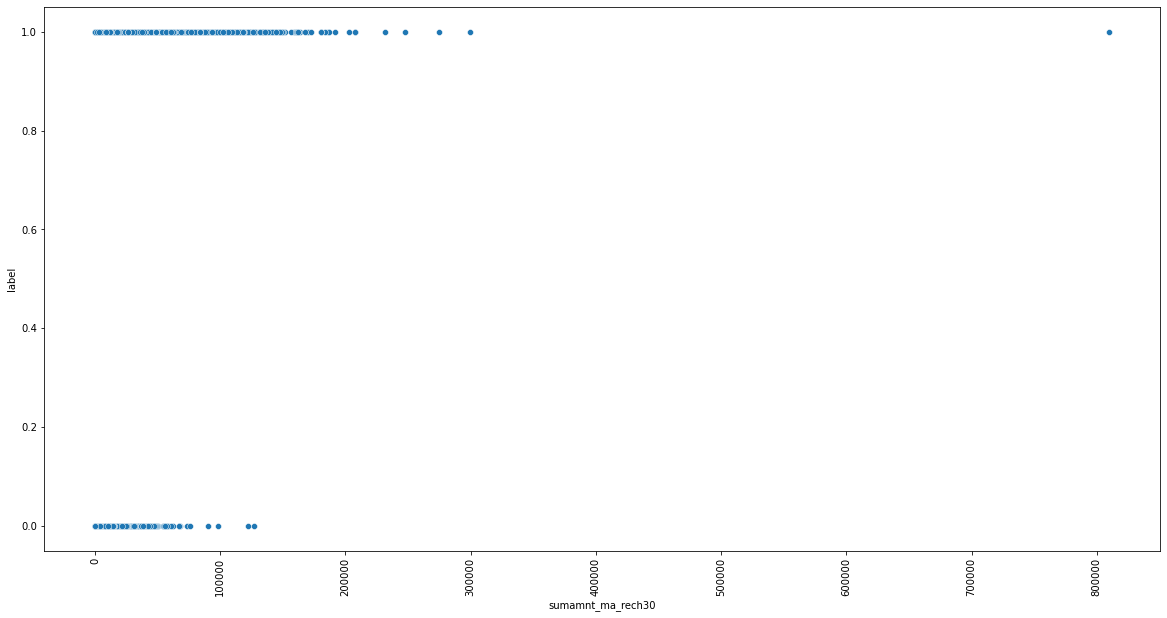

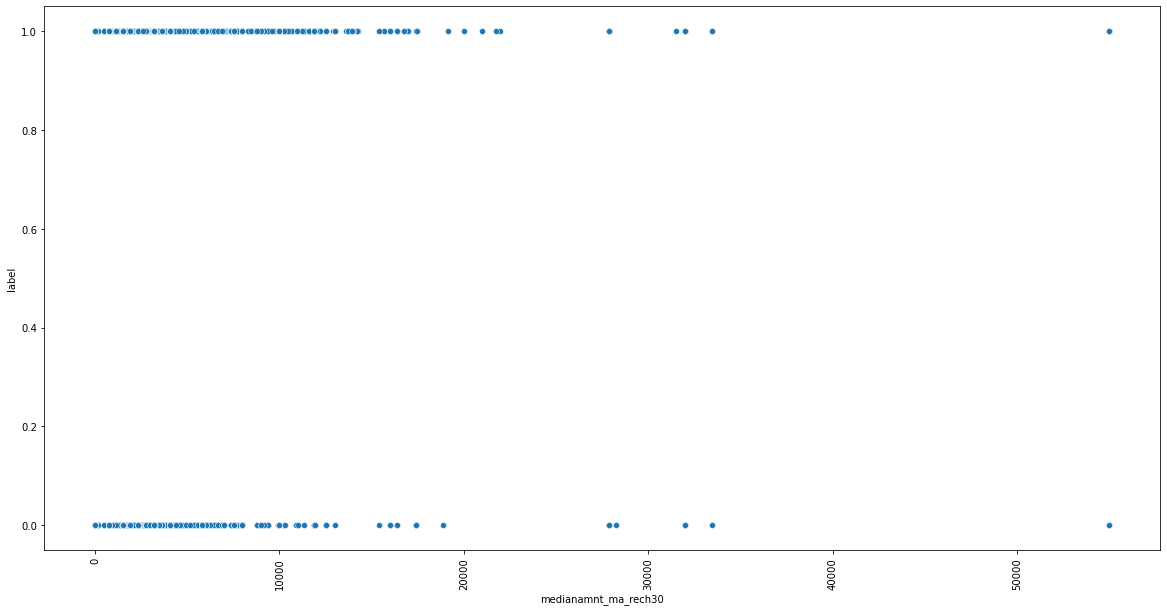

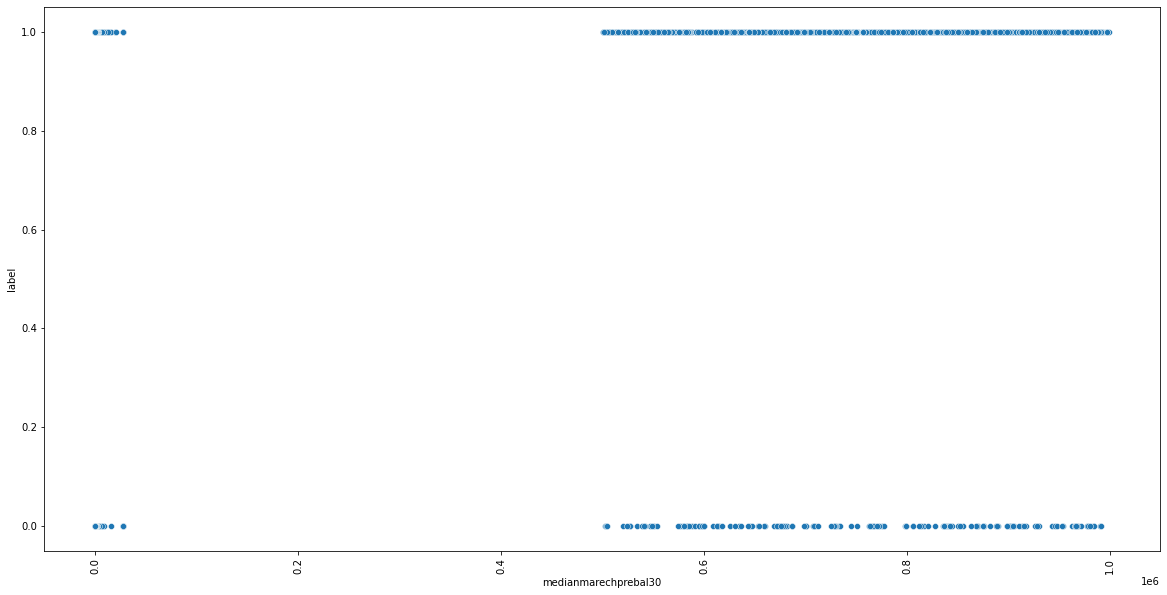

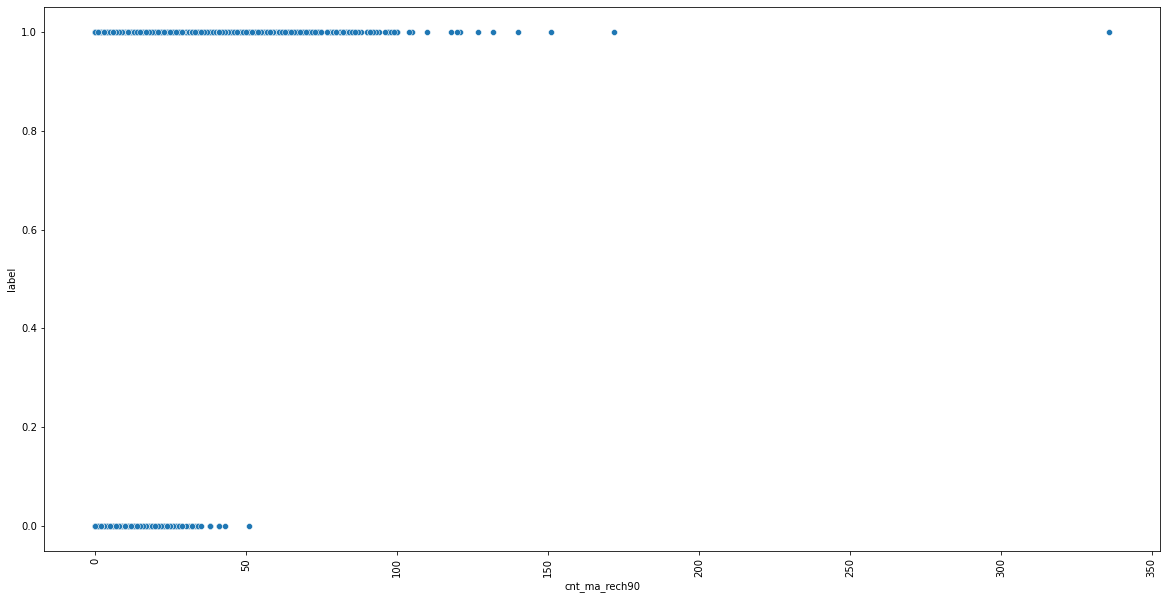

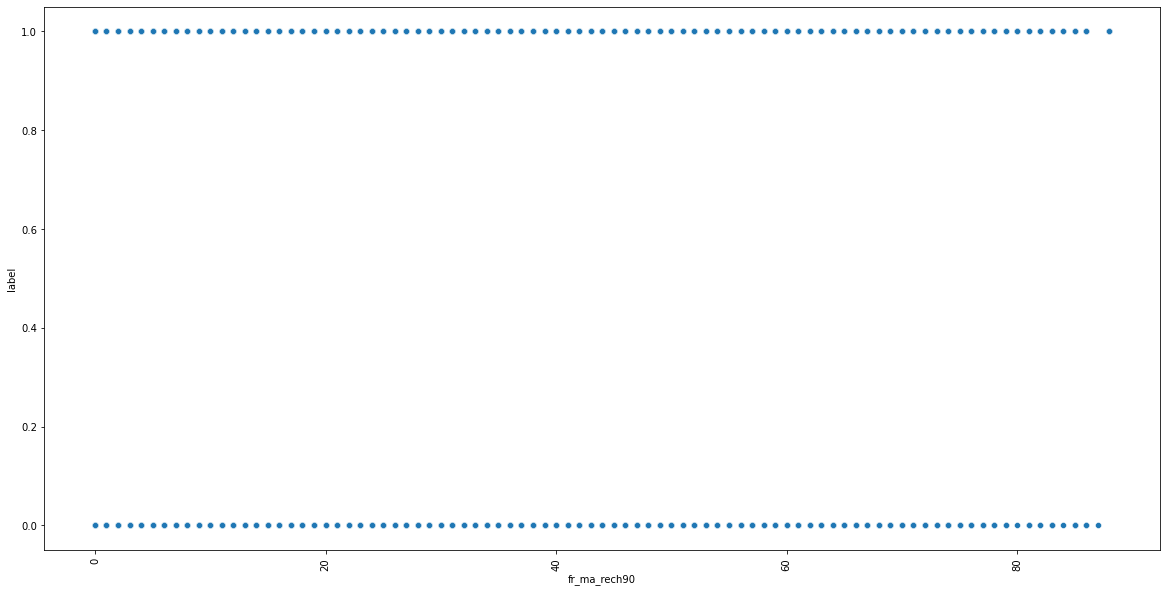

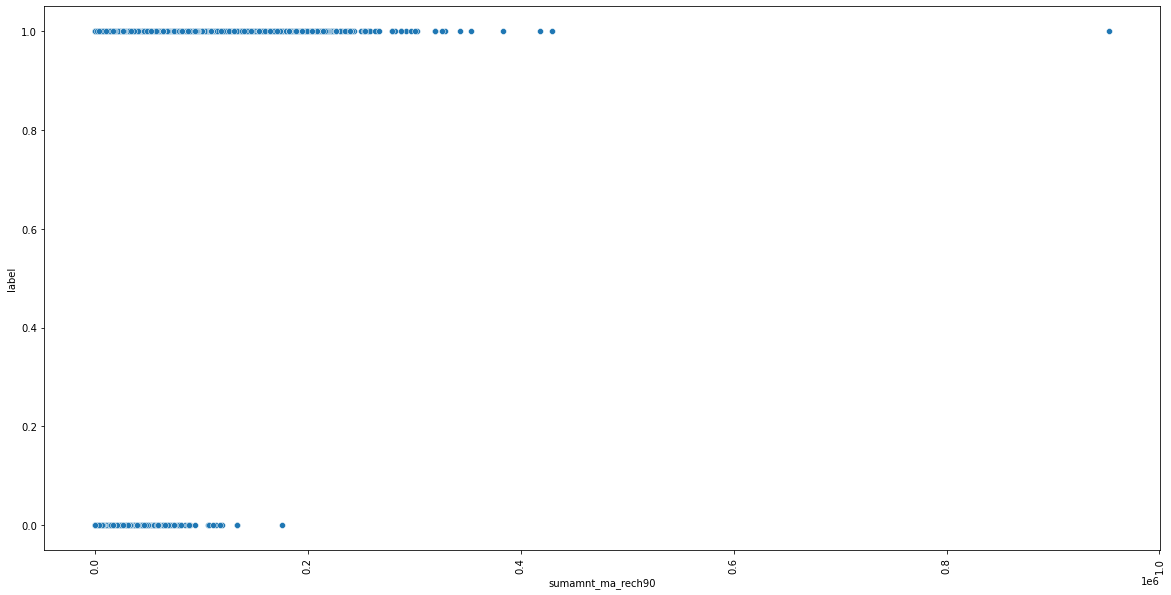

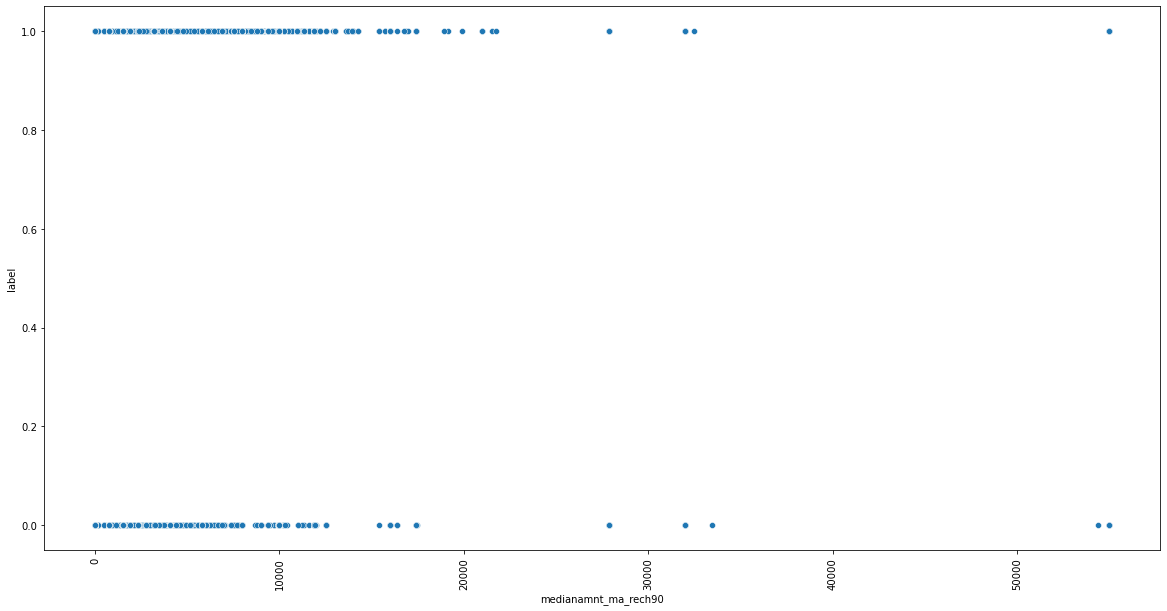

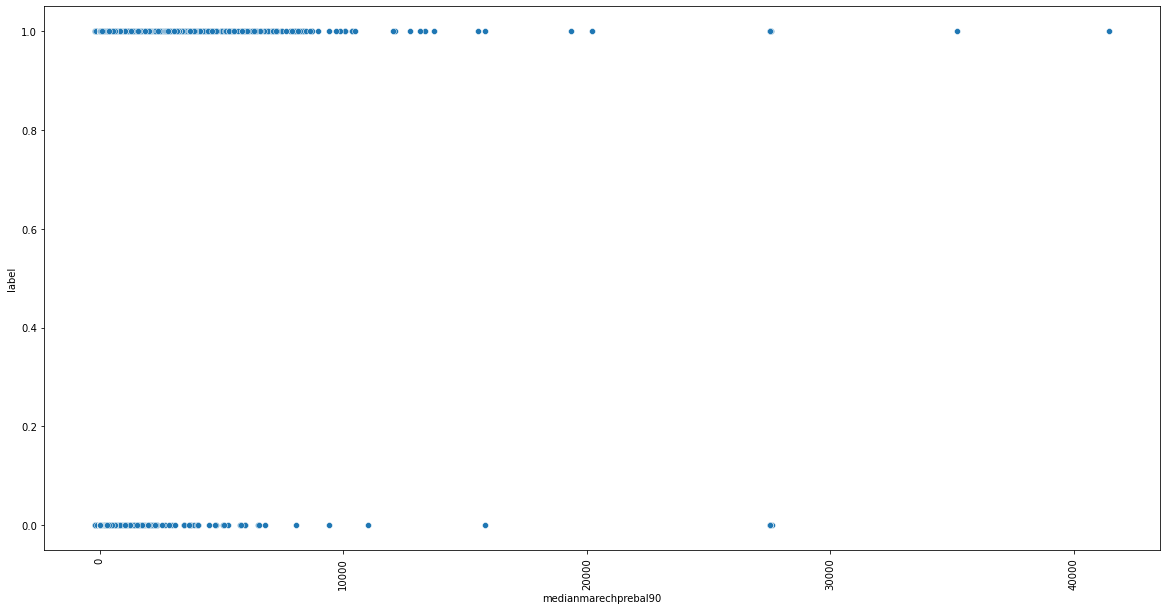

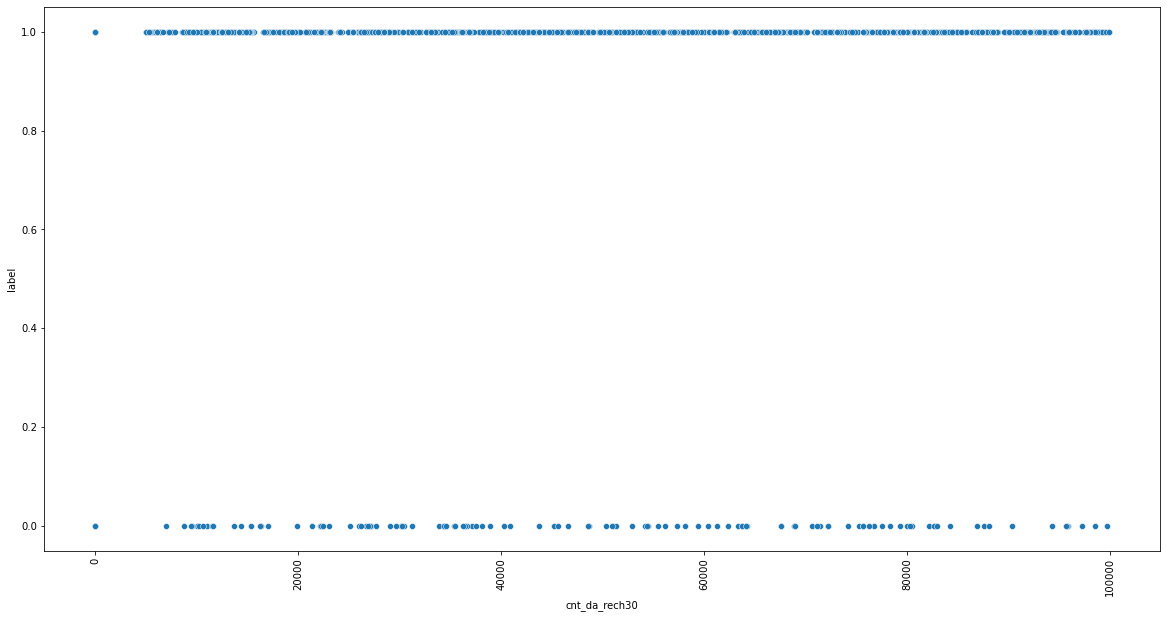

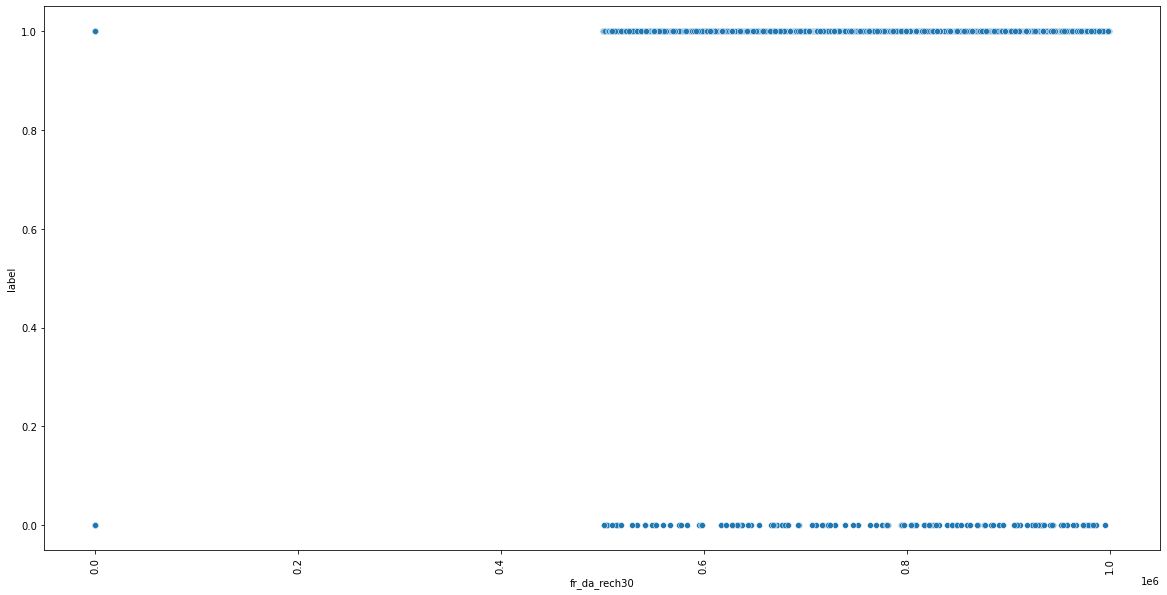

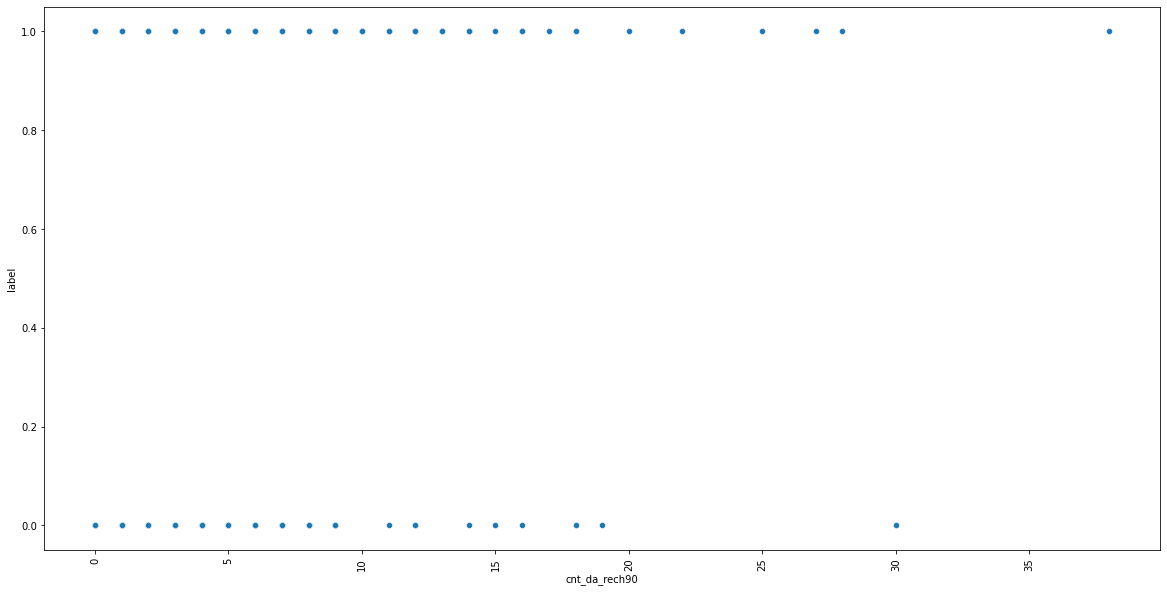

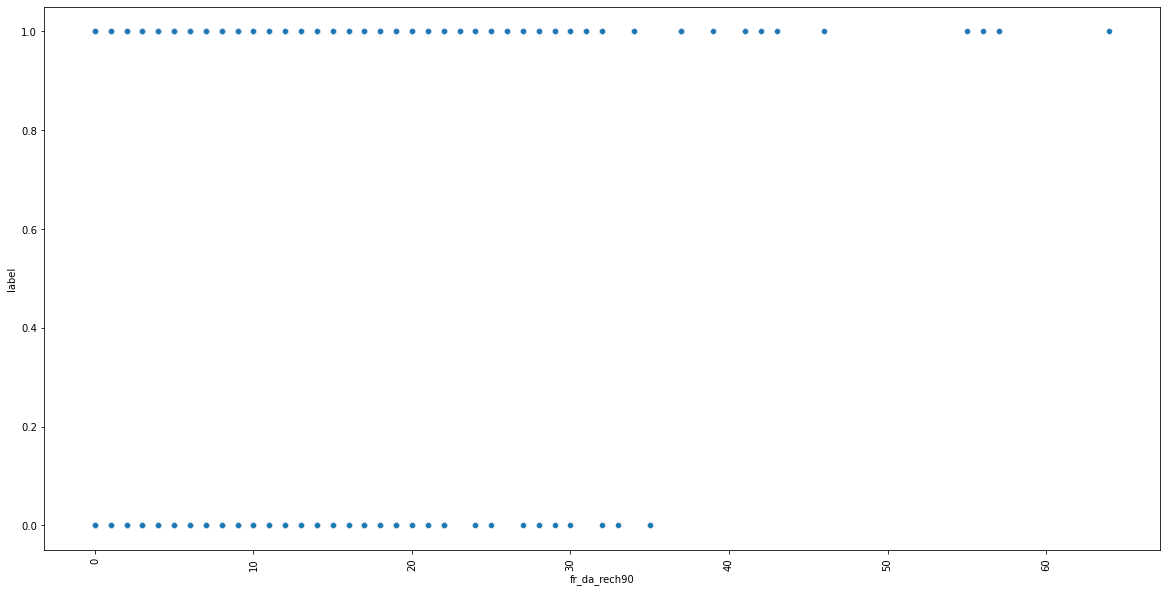

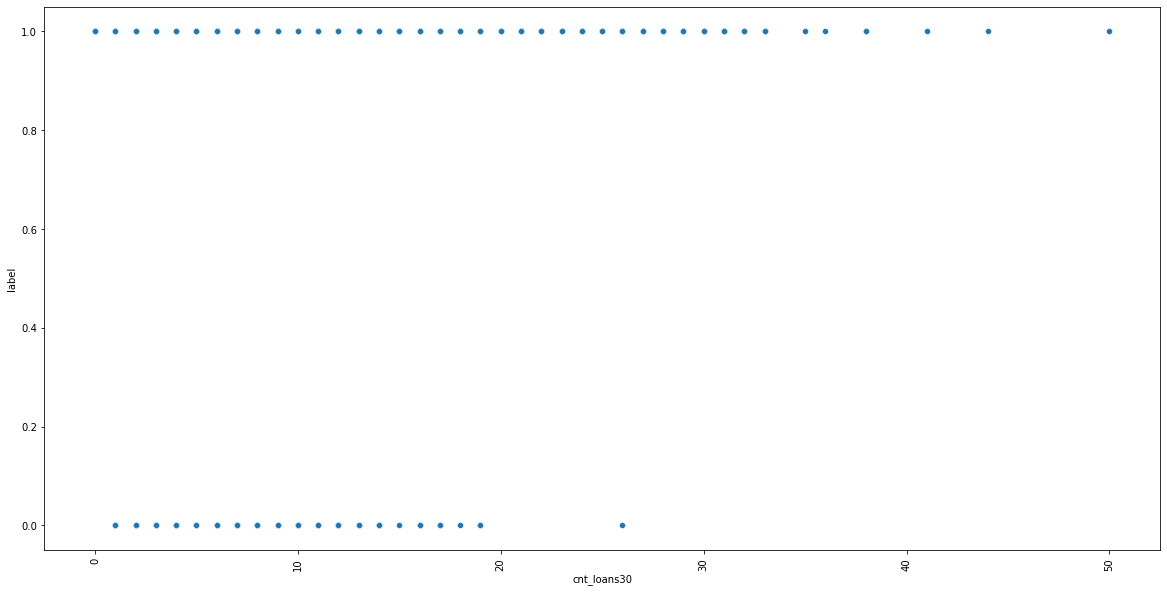

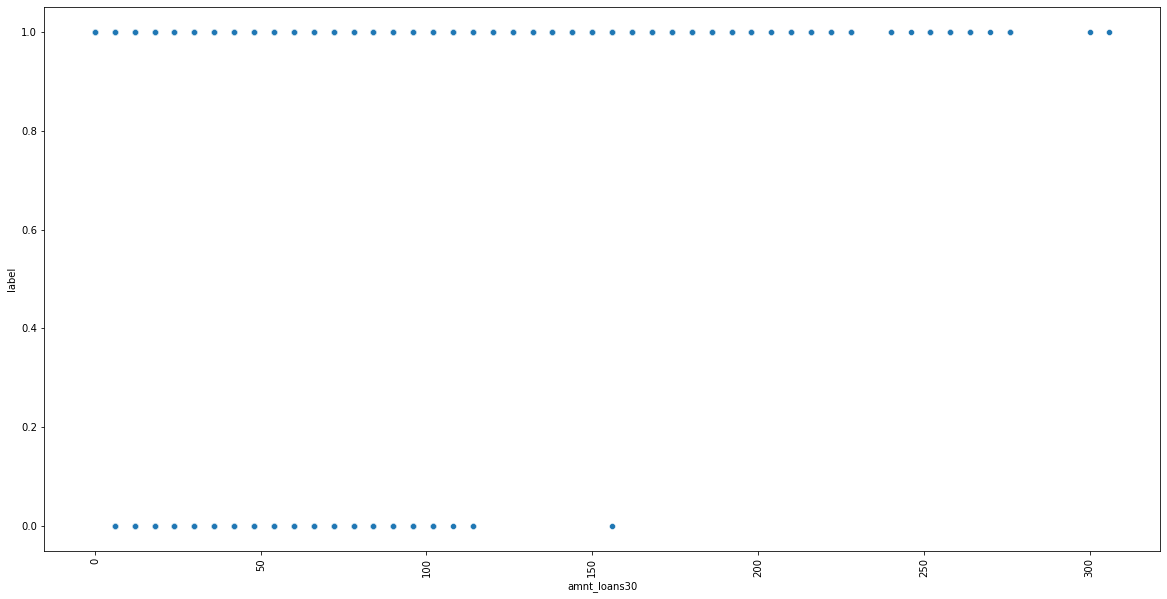

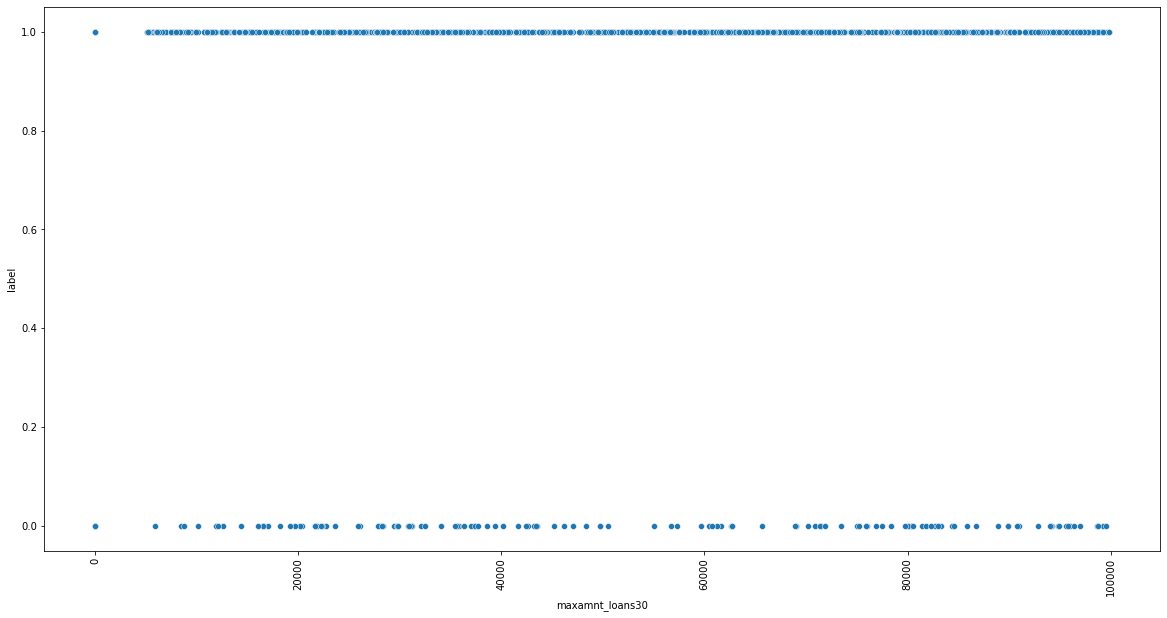

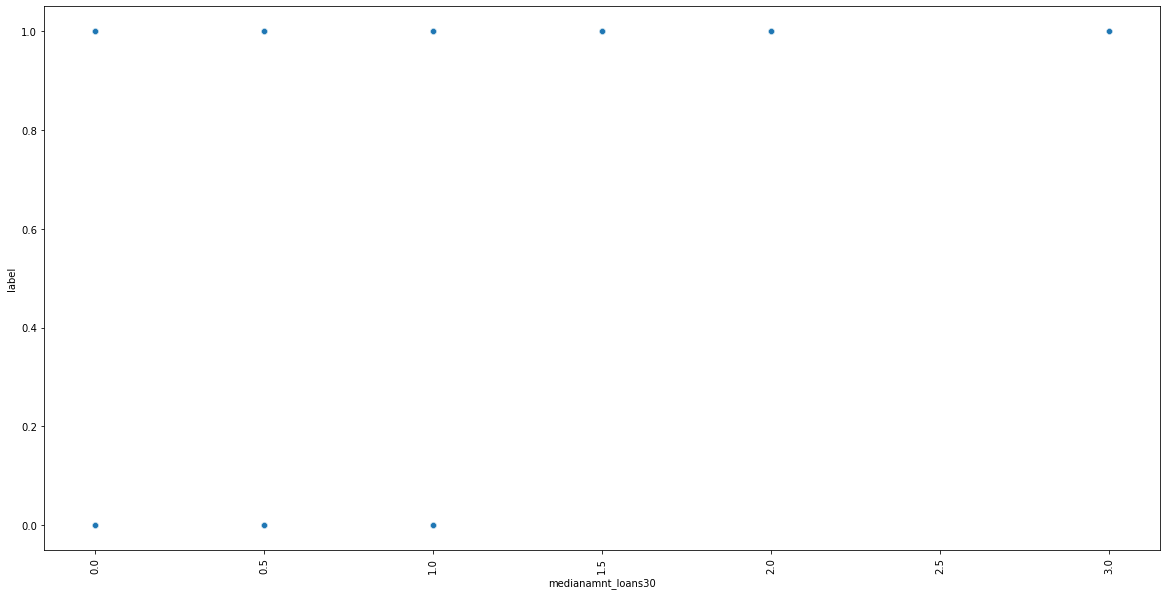

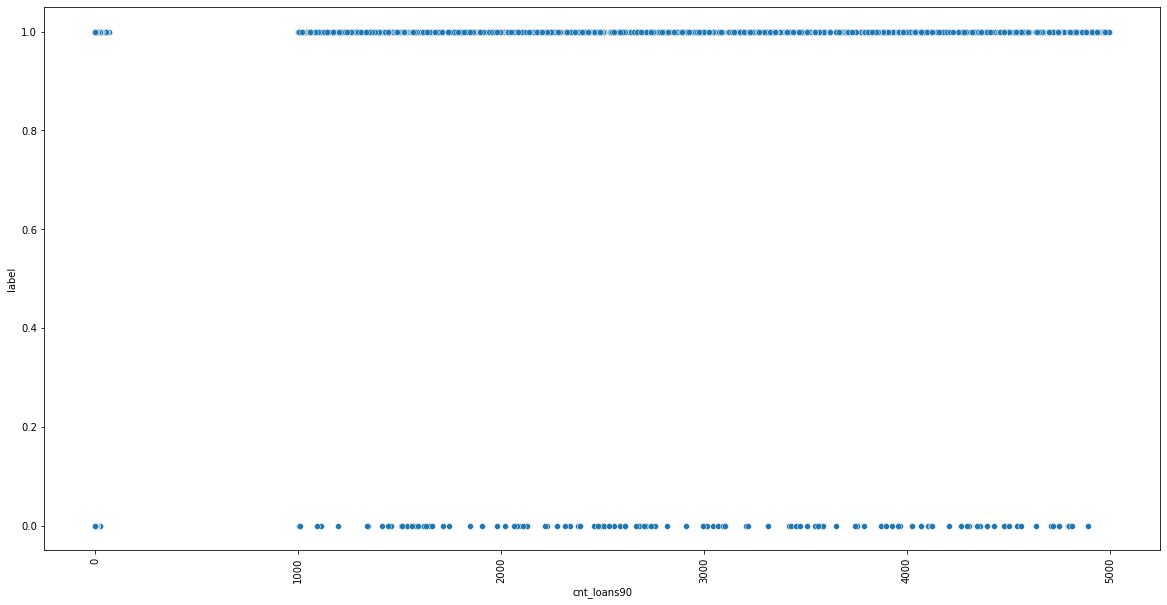

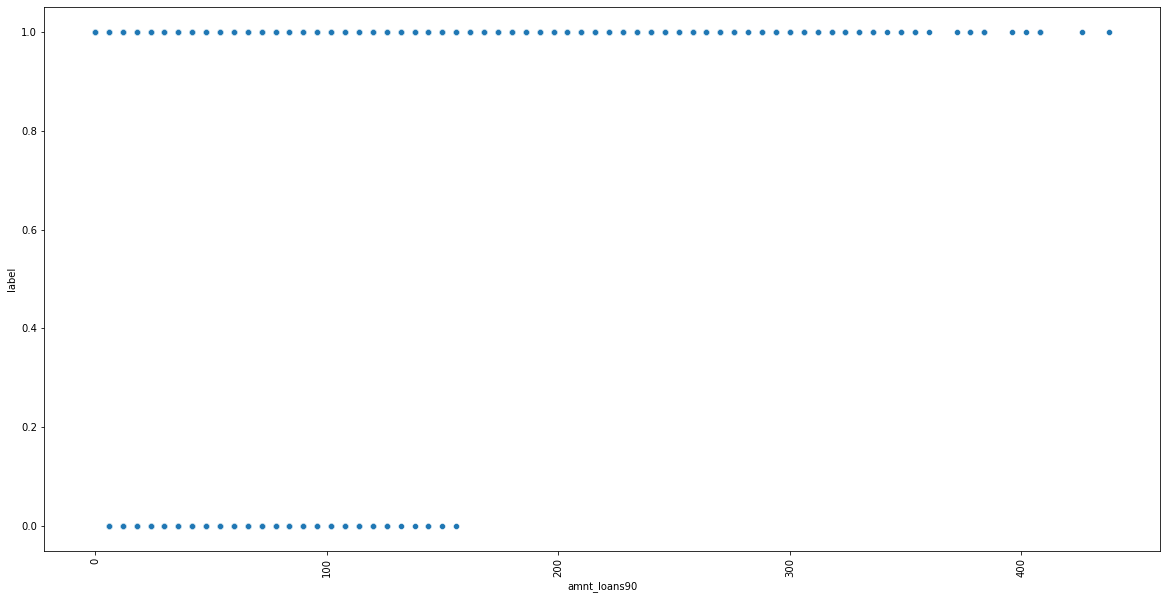

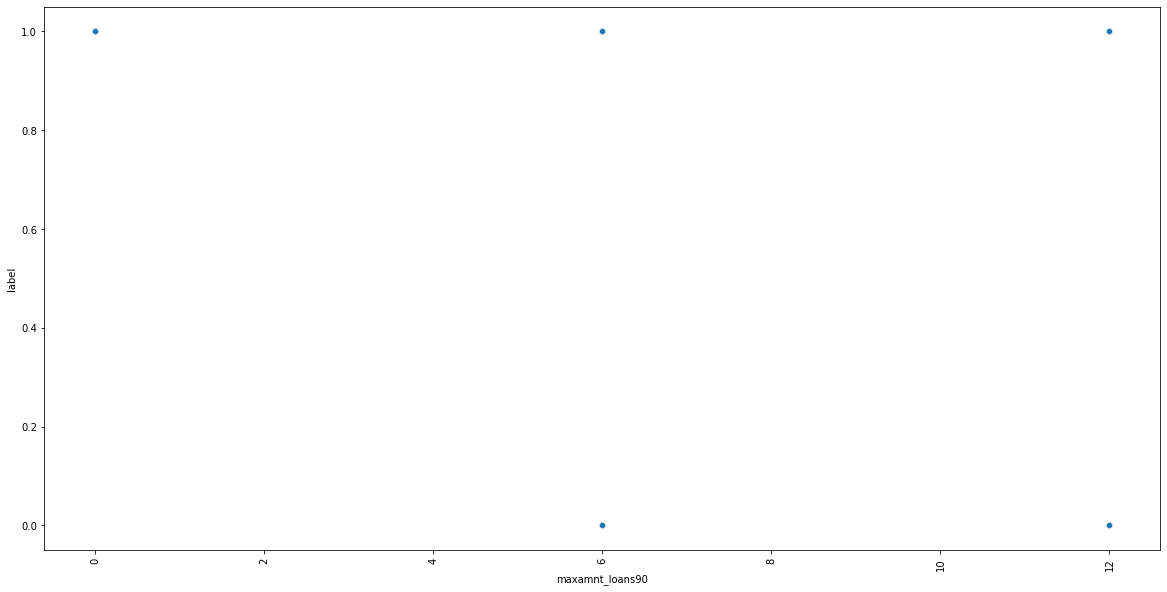

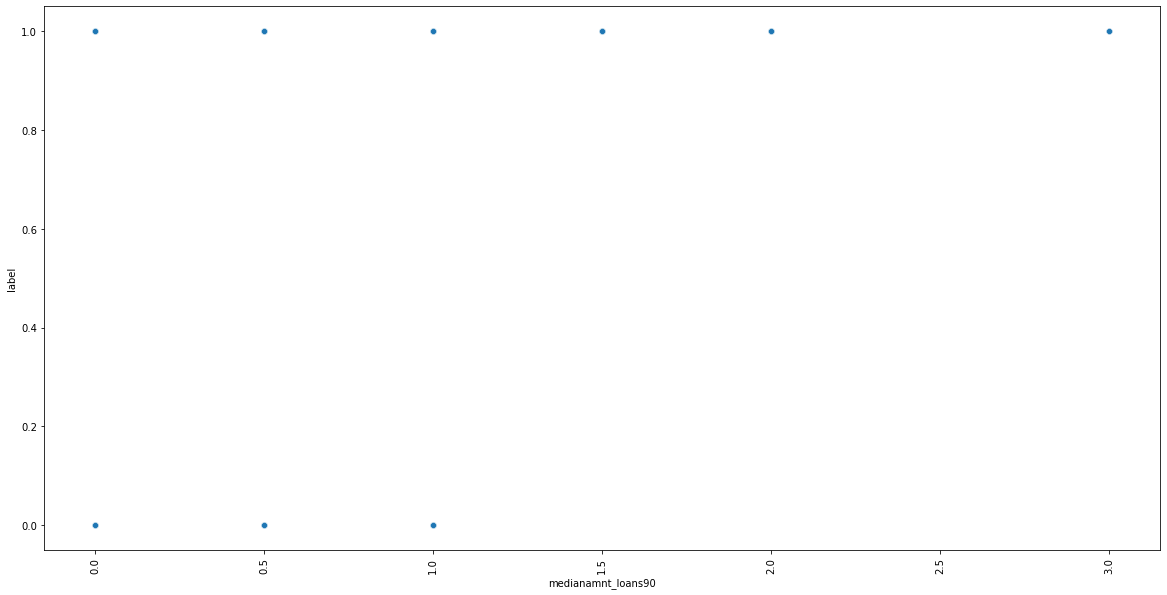

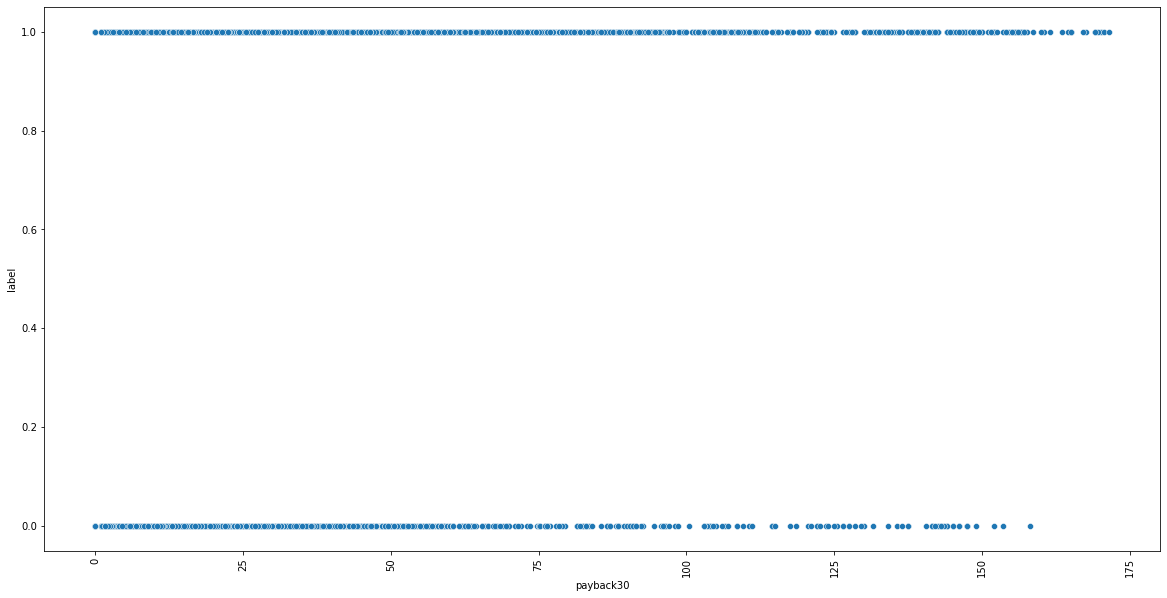

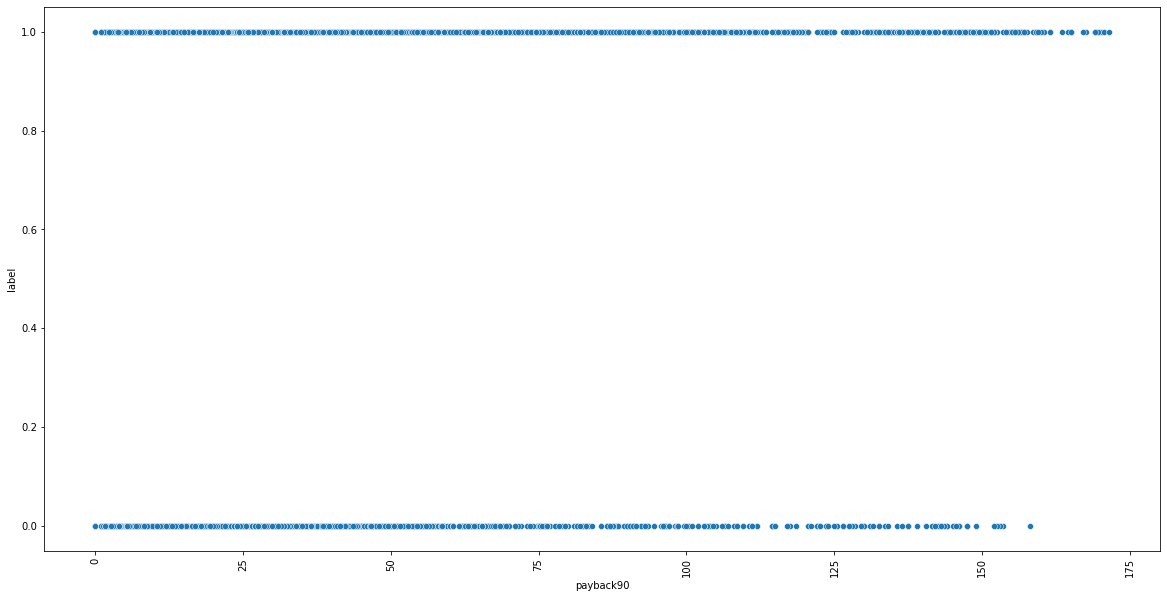

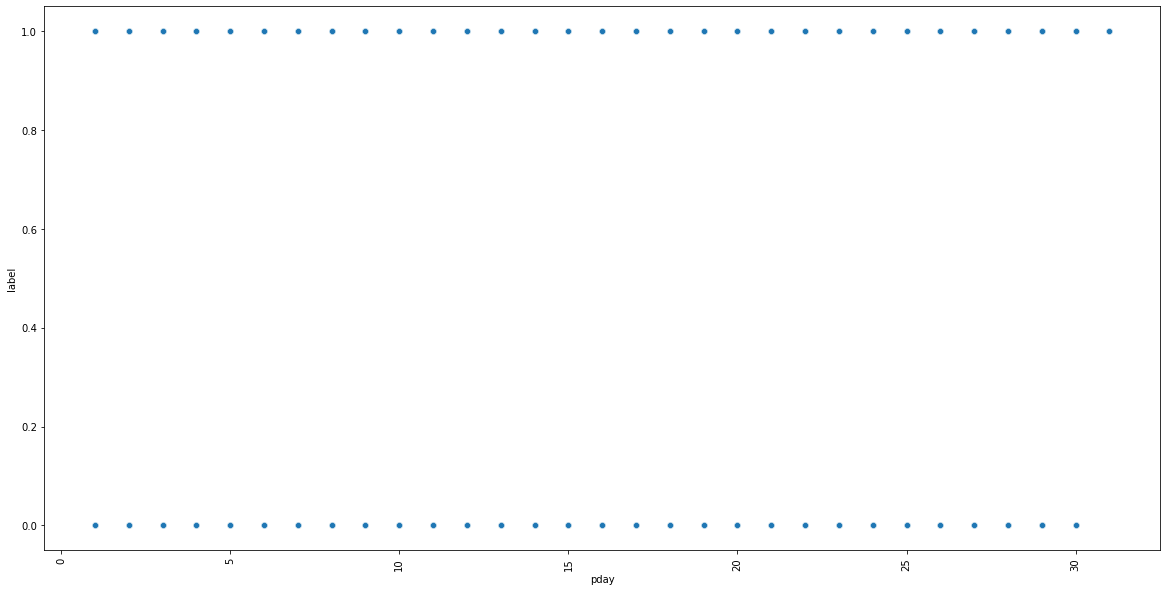

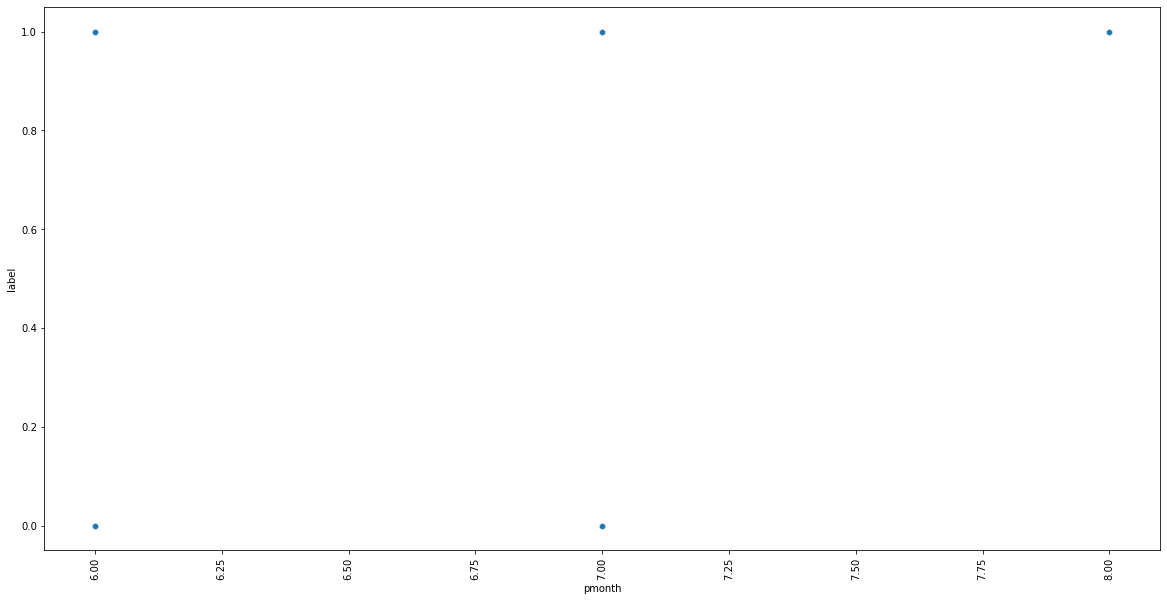

In [19]:
cont_data=df.select_dtypes(include='number')
#Plotting Scatter plot for each feature

for i in cont_data:
    plt.figure(figsize=(20,10))
    a=sns.scatterplot(x=df[i],y=df['label'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

## Encoding

In [21]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [9]:
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['msisdn']])
df['msisdn']=df1
df

label    msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0   40191.0   272.0   3055.050000   3065.150000    220.13   
1           1  142291.0   712.0  12122.000000  12124.750000   3691.26   
2           1   33594.0   535.0   1398.000000   1398.000000    900.13   
3           1  104157.0   241.0     21.228000     21.228000    159.42   
4           1    6910.0   947.0    150.619333    150.619333   1098.90   
...       ...       ...     ...           ...           ...       ...   
209588      1   42866.0   404.0    151.872333    151.872333   1089.19   
209589      1  178248.0  1075.0     36.936000     36.936000   1728.36   
209590      1   53995.0  1013.0  11843.111667  11904.350000   5861.83   
209591      1  111388.0  1732.0  12488.228333  12574.370000    411.83   
209592      1  121263.0  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pday  \
0                     6                 0.0  29.000000  29.000000    20   
1                    12                 0.0   0.000000   0.000000    10   
2                     6                 0.0   0.000000   0.000000    19   
3                     6                 0.0   0.000000   0.000000     6   
4                     6                 0.0   2.333333   2.333333    22   
...                 ...                 ...        ...        ...   ...   
209588                6                 0.0   1.000000   1.000000    17   
209589                6                 0.0   1.000000   1.000000    12   
209590               12                 0.0   4.000000   3.833333    29   
209591               12                 0.0   0.000000  10.500000    25   
209592               12                 0.0   0.000000   0.000000     7   

        pmonth  
0            7  
1            8  
2            8  
3            6  
4            6  
...        ...  
209588       6  
209589       6  
209590       7  
209591       7  
209592       7  

[209593 rows x 36 columns]

## Describing the data

In [24]:
df.describe().T

count          mean           std           min  \
label                 209593.0      0.875177      0.330519      0.000000   
msisdn                209593.0  93100.650179  53758.461427      0.000000   
aon                   209593.0   8112.343445  75696.082531    -48.000000   
daily_decr30          209593.0   5381.402289   9220.623400    -93.012667   
daily_decr90          209593.0   6082.515068  10918.812767    -93.012667   
rental30              209593.0   2692.581910   4308.586781 -23737.140000   
rental90              209593.0   3483.406534   5770.461279 -24720.580000   
last_rech_date_ma     209593.0   3755.847800  53905.892230    -29.000000   
last_rech_date_da     209593.0   3712.202921  53374.833430    -29.000000   
last_rech_amt_ma      209593.0   2064.452797   2370.786034      0.000000   
cnt_ma_rech30         209593.0      3.978057      4.256090      0.000000   
fr_ma_rech30          209593.0   3737.355121  53643.625172      0.000000   
sumamnt_ma_rech30     209593.0   7704.501157  10139.621714      0.000000   
medianamnt_ma_rech30  209593.0   1812.817952   2070.864620      0.000000   
medianmarechprebal30  209593.0   3851.927942  54006.374433   -200.000000   
cnt_ma_rech90         209593.0      6.315430      7.193470      0.000000   
fr_ma_rech90          209593.0      7.716780     12.590251      0.000000   
sumamnt_ma_rech90     209593.0  12396.218352  16857.793882      0.000000   
medianamnt_ma_rech90  209593.0   1864.595821   2081.680664      0.000000   
medianmarechprebal90  209593.0     92.025541    369.215658   -200.000000   
cnt_da_rech30         209593.0    262.578110   4183.897978      0.000000   
fr_da_rech30          209593.0   3749.494447  53885.414979      0.000000   
cnt_da_rech90         209593.0      0.041495      0.397556      0.000000   
fr_da_rech90          209593.0      0.045712      0.951386      0.000000   
cnt_loans30           209593.0      2.758981      2.554502      0.000000   
amnt_loans30          209593.0     17.952021     17.379741      0.000000   
maxamnt_loans30       209593.0    274.658747   4245.264648      0.000000   
medianamnt_loans30    209593.0      0.054029      0.218039      0.000000   
cnt_loans90           209593.0     18.520919    224.797423      0.000000   
amnt_loans90          209593.0     23.645398     26.469861      0.000000   
maxamnt_loans90       209593.0      6.703134      2.103864      0.000000   
medianamnt_loans90    209593.0      0.046077      0.200692      0.000000   
payback30             209593.0      3.398826      8.813729      0.000000   
payback90             209593.0      4.321485     10.308108      0.000000   
pday                  209593.0     14.398940      8.438900      1.000000   
pmonth                209593.0      6.797321      0.741435      6.000000   

                            25%           50%        75%            max  
label                     1.000      1.000000       1.00       1.000000  
msisdn                46506.000  93073.000000  139626.00  186242.000000  
aon                     246.000    527.000000     982.00  999860.755168  
daily_decr30             42.440   1469.175667    7244.00  265926.000000  
daily_decr90             42.692   1500.000000    7802.79  320630.000000  
rental30                280.420   1083.570000    3356.94  198926.110000  
rental90                300.260   1334.000000    4201.79  200148.110000  
last_rech_date_ma         1.000      3.000000       7.00  998650.377733  
last_rech_date_da         0.000      0.000000       0.00  999171.809410  
last_rech_amt_ma        770.000   1539.000000    2309.00   55000.000000  
cnt_ma_rech30             1.000      3.000000       5.00     203.000000  
fr_ma_rech30              0.000      2.000000       6.00  999606.368132  
sumamnt_ma_rech30      1540.000   4628.000000   10010.00  810096.000000  
medianamnt_ma_rech30    770.000   1539.000000    1924.00   55000.000000  
medianmarechprebal30     11.000     33.900000      83.00  999479.419319  
cnt_ma_rech90             2.

We could observe that aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,medianmarechprebal30,medianmarechprebal90 minimum values are in negative.
aon, daily_decr30,daily_decr90 values cannot be negative as age on network can either br 0 or any positive number, age can never be negative.
Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) i.e. daily_decr30 can also never be negative as its an amount spent it can either be 0 or positive.
Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) i.e. daily_decr90 can also never be negative as its an amount spent it can either be 0 or positive. 
rental30 and rental 90 being the average account balance over 30 days and 90 days respectively can be considered as negative.
Number of days till last recharge of main account i.e. last_rech_date_ma can never be in negative so we would replace negative values by 0.
Number of days till last recharge of data i.e. last_rech_date_da can never be in negative so we would replace negative values by 0.
medianmarechprebal30 and medianmarechprebal90 can be negative as this is the medium of account balance which could be in negative.


In [8]:
#checking aon
df.loc[df['aon']<0]

label    msisdn   aon  daily_decr30  daily_decr90  rental30  rental90  \
30          1  130656.0 -42.0      8.864333      8.864333    780.71    780.71   
197         1   88890.0 -36.0     32.075333     32.075333   1557.53   1557.53   
322         1    5405.0 -37.0      9.160000      9.160000    203.04    203.04   
504         1  140816.0 -36.0     11.470333     11.470333     40.04     40.04   
603         1  109121.0 -35.0     12.474000     12.474000   1823.08   1823.08   
...       ...       ...   ...           ...           ...       ...       ...   
208716      1   18988.0 -34.0     19.260000     19.260000    714.15    714.15   
209121      1  122094.0 -18.0    700.580000    700.600000   1057.72   1090.76   
209240      1   66217.0 -28.0     10.640000     10.640000    133.35    133.35   
209421      1   97983.0 -44.0      7.166667      7.166667    368.55    368.55   
209514      0   95860.0  -2.0   1030.000000   1030.000000    634.91    634.91   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
30          780195.497093                0.0               773  ...   
197              1.000000                0.0              1539  ...   
322              1.000000                0.0               770  ...   
504              1.000000                0.0               770  ...   
603              1.000000                0.0              1539  ...   
...                   ...                ...               ...  ...   
208716           1.000000                0.0               773  ...   
209121           1.000000                0.0               770  ...   
209240           1.000000                0.0               770  ...   
209421           1.000000                0.0               773  ...   
209514           1.000000                0.0              1539  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
30                  6.0                 1.0     1.000000             6   
197                 6.0                 0.0     1.000000             6   
322                 6.0                 0.0     1.000000             6   
504                 6.0                 0.0  3565.786503             6   
603                 6.0                 0.0     1.000000             6   
...                 ...                 ...          ...           ...   
208716              6.0                 0.0     1.000000             6   
209121              6.0                 0.0     1.000000             6   
209240              6.0                 0.0     1.000000             6   
209421              6.0                 0.0     1.000000             6   
209514              6.0                 1.0     1.000000             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pday  \
30                    6                 1.0        0.0        0.0     7   
197                   6                 0.0        0.0        0.0    13   
322                   6                 0.0        0.0        0.0    12   
504                   6                 0.0        0.0        0.0    13   
603                   6                 0.0        0.0        0.0    14   
...                 ...                 ...        ...        ...   ...   
208716                6                 0.0        0.0        0.0    15   
209121                6                 0.0        0.0        0.0     1   
209240                6                 0.0        0.0        0.0    21   
209421                6                 0.0        0.0        0.0     5   
209514                6                 1.0        0.0        0.0    17   

        pmonth  
30           6  
197          6  
322          6  
504          6  
603          6  
...        ...  
208716       6  
209121       7  
209240       6  
209421       6  
209514       7  

[1539 rows x 36 columns]

There are 1539 rows where aon value is in negative we would replace these negative values by 0.

In [10]:
i=df.index[df['aon']<0].tolist()
print(len(i))

1539


In [11]:
df.loc[i,'aon'] = 0

In [12]:
df.loc[df['aon']<0]

Empty DataFrame
Columns: [label, msisdn, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, pday, pmonth]
Index: []

[0 rows x 36 columns]

In [10]:
#daily_decr30
df.loc[df['daily_decr30']<0]

label    msisdn     aon  daily_decr30  daily_decr90  rental30  \
74          0  151932.0   169.0     -2.166667     -2.166667    135.72   
78          0   51870.0   766.0     -0.250000     -0.250000      0.00   
96          0   88664.0   799.0     -0.900000     -0.900000    140.94   
109         0   93298.0   136.0     -0.400000     -0.400000      0.00   
273         0   74291.0   549.0     -0.481667     -0.481667   1153.11   
...       ...       ...     ...           ...           ...       ...   
209223      1   97831.0   643.0     -0.825000     -0.825000     45.00   
209255      0  157172.0   882.0     -5.000000     -5.000000  12208.50   
209287      0   55359.0  1818.0     -0.180000     -0.180000   1127.52   
209426      0   46861.0  1061.0     -0.331333     -0.331333    426.16   
209512      0  121614.0   112.0     -0.500000     -0.500000      0.00   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
74        135.72                0.0                0.0                 0  ...   
78          0.00                0.0                0.0                 0  ...   
96        140.94                0.0                0.0                 0  ...   
109         0.00                0.0                0.0                 0  ...   
273      1153.11                0.0                0.0                 0  ...   
...          ...                ...                ...               ...  ...   
209223     45.00                1.0                0.0              7526  ...   
209255  12208.50                0.0                0.0                 0  ...   
209287   1127.52                0.0                0.0                 0  ...   
209426    426.16                0.0                0.0                 0  ...   
209512      0.00               50.0                0.0               773  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
74                  6.0                 0.0          1.0             6   
78                  6.0                 0.0          1.0             6   
96                  6.0                 0.0          1.0             6   
109                 6.0                 0.0          1.0             6   
273                 6.0                 0.0          1.0             6   
...                 ...                 ...          ...           ...   
209223              6.0                 0.0          1.0             6   
209255              6.0                 0.0          1.0             6   
209287              6.0                 0.0          1.0             6   
209426              6.0                 0.0          1.0             6   
209512              6.0                 0.0          1.0             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pday  \
74                    6                 0.0        0.0        0.0    13   
78                    6                 0.0        0.0        0.0    15   
96                    6                 0.0        0.0        0.0    27   
109                   6                 0.0        0.0        0.0    24   
273                   6                 0.0        0.0        0.0    17   
...                 ...                 ...        ...        ...   ...   
209223                6                 0.0        0.0        0.0    15   
209255                6                 0.0        0.0        0.0    30   
209287                6                 0.0        0.0        0.0    27   
209426                6                 0.0        0.0        0.0    14   
209512                6                 0.0        0.0        0.0    15   

        pmonth  
74           6  
78           6  
96           6  
109          6  
273          6  
...        ...  
209223       6  
209255       6  
209287       6  
209426       6  
209512       6  

[1839 rows x 36 columns]

In [13]:
i=df.index[df['daily_decr30']<0].tolist()
print(len(i))

1839


In [14]:
df.loc[i,'daily_decr30'] = 0
df.loc[df['daily_decr30']<0]

Empty DataFrame
Columns: [label, msisdn, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, pday, pmonth]
Index: []

[0 rows x 36 columns]

In [15]:
#daily_decr90
df.loc[df['daily_decr90']<0]

label    msisdn     aon  daily_decr30  daily_decr90  rental30  \
74          0  151932.0   169.0           0.0     -2.166667    135.72   
78          0   51870.0   766.0           0.0     -0.250000      0.00   
96          0   88664.0   799.0           0.0     -0.900000    140.94   
109         0   93298.0   136.0           0.0     -0.400000      0.00   
273         0   74291.0   549.0           0.0     -0.481667   1153.11   
...       ...       ...     ...           ...           ...       ...   
209223      1   97831.0   643.0           0.0     -0.825000     45.00   
209255      0  157172.0   882.0           0.0     -5.000000  12208.50   
209287      0   55359.0  1818.0           0.0     -0.180000   1127.52   
209426      0   46861.0  1061.0           0.0     -0.331333    426.16   
209512      0  121614.0   112.0           0.0     -0.500000      0.00   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
74        135.72                0.0                0.0                 0  ...   
78          0.00                0.0                0.0                 0  ...   
96        140.94                0.0                0.0                 0  ...   
109         0.00                0.0                0.0                 0  ...   
273      1153.11                0.0                0.0                 0  ...   
...          ...                ...                ...               ...  ...   
209223     45.00                1.0                0.0              7526  ...   
209255  12208.50                0.0                0.0                 0  ...   
209287   1127.52                0.0                0.0                 0  ...   
209426    426.16                0.0                0.0                 0  ...   
209512      0.00               50.0                0.0               773  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
74                  6.0                 0.0          1.0             6   
78                  6.0                 0.0          1.0             6   
96                  6.0                 0.0          1.0             6   
109                 6.0                 0.0          1.0             6   
273                 6.0                 0.0          1.0             6   
...                 ...                 ...          ...           ...   
209223              6.0                 0.0          1.0             6   
209255              6.0                 0.0          1.0             6   
209287              6.0                 0.0          1.0             6   
209426              6.0                 0.0          1.0             6   
209512              6.0                 0.0          1.0             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pday  \
74                    6                 0.0        0.0        0.0    13   
78                    6                 0.0        0.0        0.0    15   
96                    6                 0.0        0.0        0.0    27   
109                   6                 0.0        0.0        0.0    24   
273                   6                 0.0        0.0        0.0    17   
...                 ...                 ...        ...        ...   ...   
209223                6                 0.0        0.0        0.0    15   
209255                6                 0.0        0.0        0.0    30   
209287                6                 0.0        0.0        0.0    27   
209426                6                 0.0        0.0        0.0    14   
209512                6                 0.0        0.0        0.0    15   

        pmonth  
74           6  
78           6  
96           6  
109          6  
273          6  
...        ...  
209223       6  
209255       6  
209287       6  
209426       6  
209512       6  

[1839 rows x 36 columns]

In [16]:
i=df.index[df['daily_decr90']<0].tolist()
print(len(i))

1839


In [17]:
df.loc[i,'daily_decr90'] = 0
df.loc[df['daily_decr90']<0]

Empty DataFrame
Columns: [label, msisdn, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, pday, pmonth]
Index: []

[0 rows x 36 columns]

In [18]:
#last_rech_date_ma
df.loc[df['last_rech_date_ma']<0]

label    msisdn     aon  daily_decr30  daily_decr90  rental30  \
129         1   82441.0   347.0     47.466667     47.466667    186.80   
521         1  166378.0   246.0     10.740333     10.740333    205.45   
1191        1   20205.0   787.0     35.383333     35.383333    140.00   
1267        1   34233.0    90.0     16.776667     16.776667    103.20   
1323        1  150997.0   888.0      9.171000      9.171000    779.40   
...       ...       ...     ...           ...           ...       ...   
208568      1  180336.0   620.0     62.373667     62.373667    213.84   
208718      1  142631.0   428.0     10.933333     10.933333     31.84   
208915      1  145585.0   705.0      0.000000      0.000000   2488.59   
209218      1   52547.0  1341.0     19.128667     19.128667     70.00   
209264      1   26310.0   563.0     13.882667     13.882667    256.44   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
129       186.80              -13.0                0.0               770  ...   
521       205.45              -26.0                0.0              1539  ...   
1191      140.00              -28.0                0.0              1539  ...   
1267      103.20              -28.0                0.0              1539  ...   
1323      779.40              -24.0                0.0               773  ...   
...          ...                ...                ...               ...  ...   
208568    213.84              -22.0                0.0              3178  ...   
208718     31.84              -17.0                0.0              2309  ...   
208915   2488.59               -6.0                0.0              3178  ...   
209218     70.00              -26.0                0.0              8000  ...   
209264    256.44              -29.0                0.0              1547  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
129                 6.0                 0.0     1.000000             6   
521                 6.0                 0.0     1.000000             6   
1191                6.0                 0.0  4770.509656             6   
1267                6.0                 0.0     1.000000             6   
1323                6.0                 0.0     1.000000             6   
...                 ...                 ...          ...           ...   
208568              6.0                 0.0     1.000000             6   
208718              6.0                 0.0     1.000000             6   
208915              6.0                 0.0     1.000000             6   
209218              6.0                 0.0     2.000000            12   
209264              6.0                 0.0     1.000000             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pday  \
129                   6                 0.0        0.0        0.0    20   
521                   6                 0.0        0.0        0.0     7   
1191                  6                 0.0        0.0        0.0     5   
1267                  6                 0.0        0.0        0.0     5   
1323                  6                 0.0        0.0        0.0     9   
...                 ...                 ...        ...        ...   ...   
208568                6                 0.0        0.0        0.0    11   
208718                6                 0.0        0.0        0.0    16   
208915                6                 0.0        0.0        0.0    27   
209218                6                 0.0        6.0        6.0     7   
209264                6                 0.0        0.0        0.0     4   

        pmonth  
129          6  
521          6  
1191         6  
1267         6  
1323         6  
...        ...  
208568       6  
208718       6  
208915       6  
209218       6  
209264       6  

[1315 rows x 36 columns]

In [19]:
i=df.index[df['last_rech_date_ma']<0].tolist()
print(len(i))

1315


In [20]:
df.loc[i,'last_rech_date_ma'] = 0
df.loc[df['last_rech_date_ma']<0]

Empty DataFrame
Columns: [label, msisdn, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, pday, pmonth]
Index: []

[0 rows x 36 columns]

In [19]:
#last_rech_date_da
df.loc[df['last_rech_date_da']<0]

label    msisdn     aon  daily_decr30  daily_decr90  rental30  \
12856       1  106166.0   168.0     83.695333     83.695333    487.74   
14113       1  121561.0   821.0    763.445000    771.150000   2608.84   
21581       1    4290.0   108.0     21.590000     21.590000    192.84   
31819       1  138592.0   365.0   2092.346667   2103.800000   1715.28   
35139       1   54500.0   878.0      0.000000      0.000000   1700.00   
42652       1  155535.0  1361.0    166.750333    166.750333   2015.33   
63421       1  129222.0   821.0      0.000000      0.000000   1807.89   
71742       1   69242.0   604.0      7.169333      7.169333    260.60   
76000       1   65772.0   820.0     76.205333     76.205333    -57.29   
107056      1   92739.0   513.0     20.157000     20.157000     53.37   
120100      1   99160.0   900.0     27.693333     27.693333    161.32   
140061      1  132260.0  2026.0   3395.376000   3404.760000    115.92   
156344      1   67161.0   836.0     81.194667     81.194667   -182.60   
203642      1  120537.0   462.0    521.017333    526.090000    378.72   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
12856     487.74                1.0              -11.0              1539  ...   
14113    2698.80                4.0               -2.0              7526  ...   
21581     192.84                7.0              -27.0              1547  ...   
31819    1837.80               12.0               -1.0              5787  ...   
35139    1700.00                8.0               -8.0              5787  ...   
42652    2015.33                1.0              -14.0              8000  ...   
63421    1807.89                0.0              -12.0                 0  ...   
71742     260.60               40.0              -29.0               173  ...   
76000     -57.29                1.0              -16.0              8000  ...   
107056     53.37               10.0              -24.0              1547  ...   
120100    161.32                0.0              -29.0              7526  ...   
140061    124.20                4.0               -1.0              3178  ...   
156344   -182.60                1.0              -22.0             10000  ...   
203642    398.66                1.0               -1.0               770  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
12856               6.0                 0.0          3.0            18   
14113               6.0                 0.0          4.0            24   
21581               6.0                 0.0          1.0             6   
31819               6.0                 0.0          1.0             6   
35139               6.0                 1.0          1.0             6   
42652               6.0                 0.0          4.0            24   
63421               6.0                 0.0          1.0             6   
71742               6.0                 0.0          2.0            12   
76000               6.0                 0.0          2.0            12   
107056              6.0                 0.0          1.0             6   
120100              6.0                 0.0          2.0            12   
140061              6.0                 0.0          1.0             6   
156344              6.0                 0.0          1.0             6   
203642              6.0                 0.0          8.0            48   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pday  \
12856                 6                 0.0   1.666667   1.666667    22   
14113                 6                 0.0   1.333333   1.333333     1   
21581                 6                 0.0   0.000000   0.000000     6   
31819                 6                 0.0   0.000000   0.000000     2   
35139                 6                 1.0   0.000000   0.000000    25   
42652                 6                 0.0   1.750000   1.750000    19   
63421                 6                 0.0   0.000000   0.0

In [21]:
i=df.index[df['last_rech_date_da']<0].tolist()
print(len(i))

14


In [22]:
df.loc[i,'last_rech_date_da'] = 0
df.loc[df['last_rech_date_da']<0]

Empty DataFrame
Columns: [label, msisdn, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, pday, pmonth]
Index: []

[0 rows x 36 columns]

## Analysing correlation between features and labels using heatmap

In [47]:
df.corr().abs()

label    msisdn       aon  daily_decr30  \
label                 1.000000  0.001976  0.003786      0.168296   
msisdn                0.001976  1.000000  0.000566      0.000717   
aon                   0.003786  0.000566  1.000000      0.001103   
daily_decr30          0.168296  0.000717  0.001103      1.000000   
daily_decr90          0.166148  0.000950  0.000372      0.977704   
rental30              0.058085  0.001404  0.000962      0.442067   
rental90              0.075521  0.000691  0.000792      0.458977   
last_rech_date_ma     0.003729  0.000928  0.001692      0.000486   
last_rech_date_da     0.001711  0.001400  0.001693      0.001636   
last_rech_amt_ma      0.131804  0.002368  0.004255      0.275837   
cnt_ma_rech30         0.237331  0.000617  0.003150      0.451384   
fr_ma_rech30          0.001330  0.001804  0.001163      0.000577   
sumamnt_ma_rech30     0.202828  0.001094  0.000705      0.636536   
medianamnt_ma_rech30  0.141490  0.000668  0.004305      0.295355   
medianmarechprebal30  0.004829  0.000238  0.003930      0.001153   
cnt_ma_rech90         0.236392  0.001859  0.002727      0.587337   
fr_ma_rech90          0.084385  0.004413  0.004400      0.078300   
sumamnt_ma_rech90     0.205793  0.000936  0.001009      0.762981   
medianamnt_ma_rech90  0.120855  0.000625  0.004908      0.257846   
medianmarechprebal90  0.039300  0.000615  0.000859      0.037495   
cnt_da_rech30         0.003827  0.001720  0.001564      0.000700   
fr_da_rech30          0.000027  0.000241  0.000892      0.001499   
cnt_da_rech90         0.002999  0.004595  0.001121      0.038814   
fr_da_rech90          0.005418  0.002233  0.005395      0.020673   
cnt_loans30           0.196283  0.001765  0.001828      0.366115   
amnt_loans30          0.197272  0.002170  0.001728      0.471491   
maxamnt_loans30       0.000248  0.000755  0.002764      0.000028   
medianamnt_loans30    0.044589  0.000986  0.004665      0.011611   
cnt_loans90           0.004733  0.001859  0.000611      0.008962   
amnt_loans90          0.199788  0.000155  0.002321      0.563496   
maxamnt_loans90       0.084144  0.003286  0.001192      0.400199   
medianamnt_loans90    0.035747  0.001210  0.002771      0.037305   
payback30             0.048336  0.002922  0.001939      0.026915   
payback90             0.049183  0.002671  0.002202      0.047174   
pday                  0.006825  0.002466  0.000661      0.006478   
pmonth                0.154949  0.002986  0.001866      0.518663   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
label                     0.166148  0.058085  0.075521           0.003729   
msisdn                    0.000950  0.001404  0.000691           0.000928   
aon                       0.000372  0.000962  0.000792           0.001692   
daily_decr30              0.977704  0.442067  0.458977           0.000486   
daily_decr90              1.000000  0.434686  0.471731           0.000907   
rental30                  0.434686  1.000000  0.955237           0.001097   
rental90                  0.471731  0.955237  1.000000           0.001689   
last_rech_date_ma         0.000907  0.001097  0.001689           1.000000   
last_rech_date_da         0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416           0.000146   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004309   
fr_ma_rech30              0.000343  0.001219  0.000503           0.001629   
sumamnt_ma_rech30         0.603885  0.272649  0.259709           0.002104   
medianamnt_ma_rech30      0.282959  0.129853  0.120242           0.001358   
medianmarechprebal30      0.000746  0.001415  0.001237           0.004071   
cnt_ma_rech90             0.593068  0.312118  0.345293           0.004262   
fr_ma_rech90              0.079530  0.033530  0.036524           0.001416   
sumamnt_ma_rech90         0.768817  0.342306  0.360601           0.002242   
medianamnt_ma_rech90      0.250518  0.110356 

In [57]:
# Plotting heat map for better analysis
sns.set(font_scale=10)
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f',annot_kws={
                'fontsize':60,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })

<AxesSubplot:>

There can be many multicollinearity in this data so in order to be sure lets check vif score of each feature.

## VIF

In [58]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

          vif              features
0    8.950241                 label
1    3.931281                msisdn
2    1.011569                   aon
3   39.208709          daily_decr30
4   42.395272          daily_decr90
5   18.353125              rental30
6   18.936472              rental90
7    1.004978     last_rech_date_ma
8    1.004934     last_rech_date_da
9    6.040311      last_rech_amt_ma
10  28.258612         cnt_ma_rech30
11   1.004948          fr_ma_rech30
12  20.064883     sumamnt_ma_rech30
13   8.993500  medianamnt_ma_rech30
14   1.005210  medianmarechprebal30
15  28.961407         cnt_ma_rech90
16   1.485709          fr_ma_rech90
17  23.404068     sumamnt_ma_rech90
18  10.152467  medianamnt_ma_rech90
19   1.132056  medianmarechprebal90
20   1.004150         cnt_da_rech30
21   1.004968          fr_da_rech30
22   1.161600         cnt_da_rech90
23   1.143062          fr_da_rech90
24  49.648647           cnt_loans30
25  60.648256          amnt_loans30
26   1.004318       maxamnt_

Multicollinearity exists between daily_decr30 and daily_decr90, rental30 and rental90, cnt_ma_rech30 and sumamnt_ma_rech30,cnt_ma_rech90 and sumamnt_ma_rech90,cnt_loans30 and amnt_loans30, amnt_loans90 and maxamnt_loans90 and pmonth.   

## Checking outliers

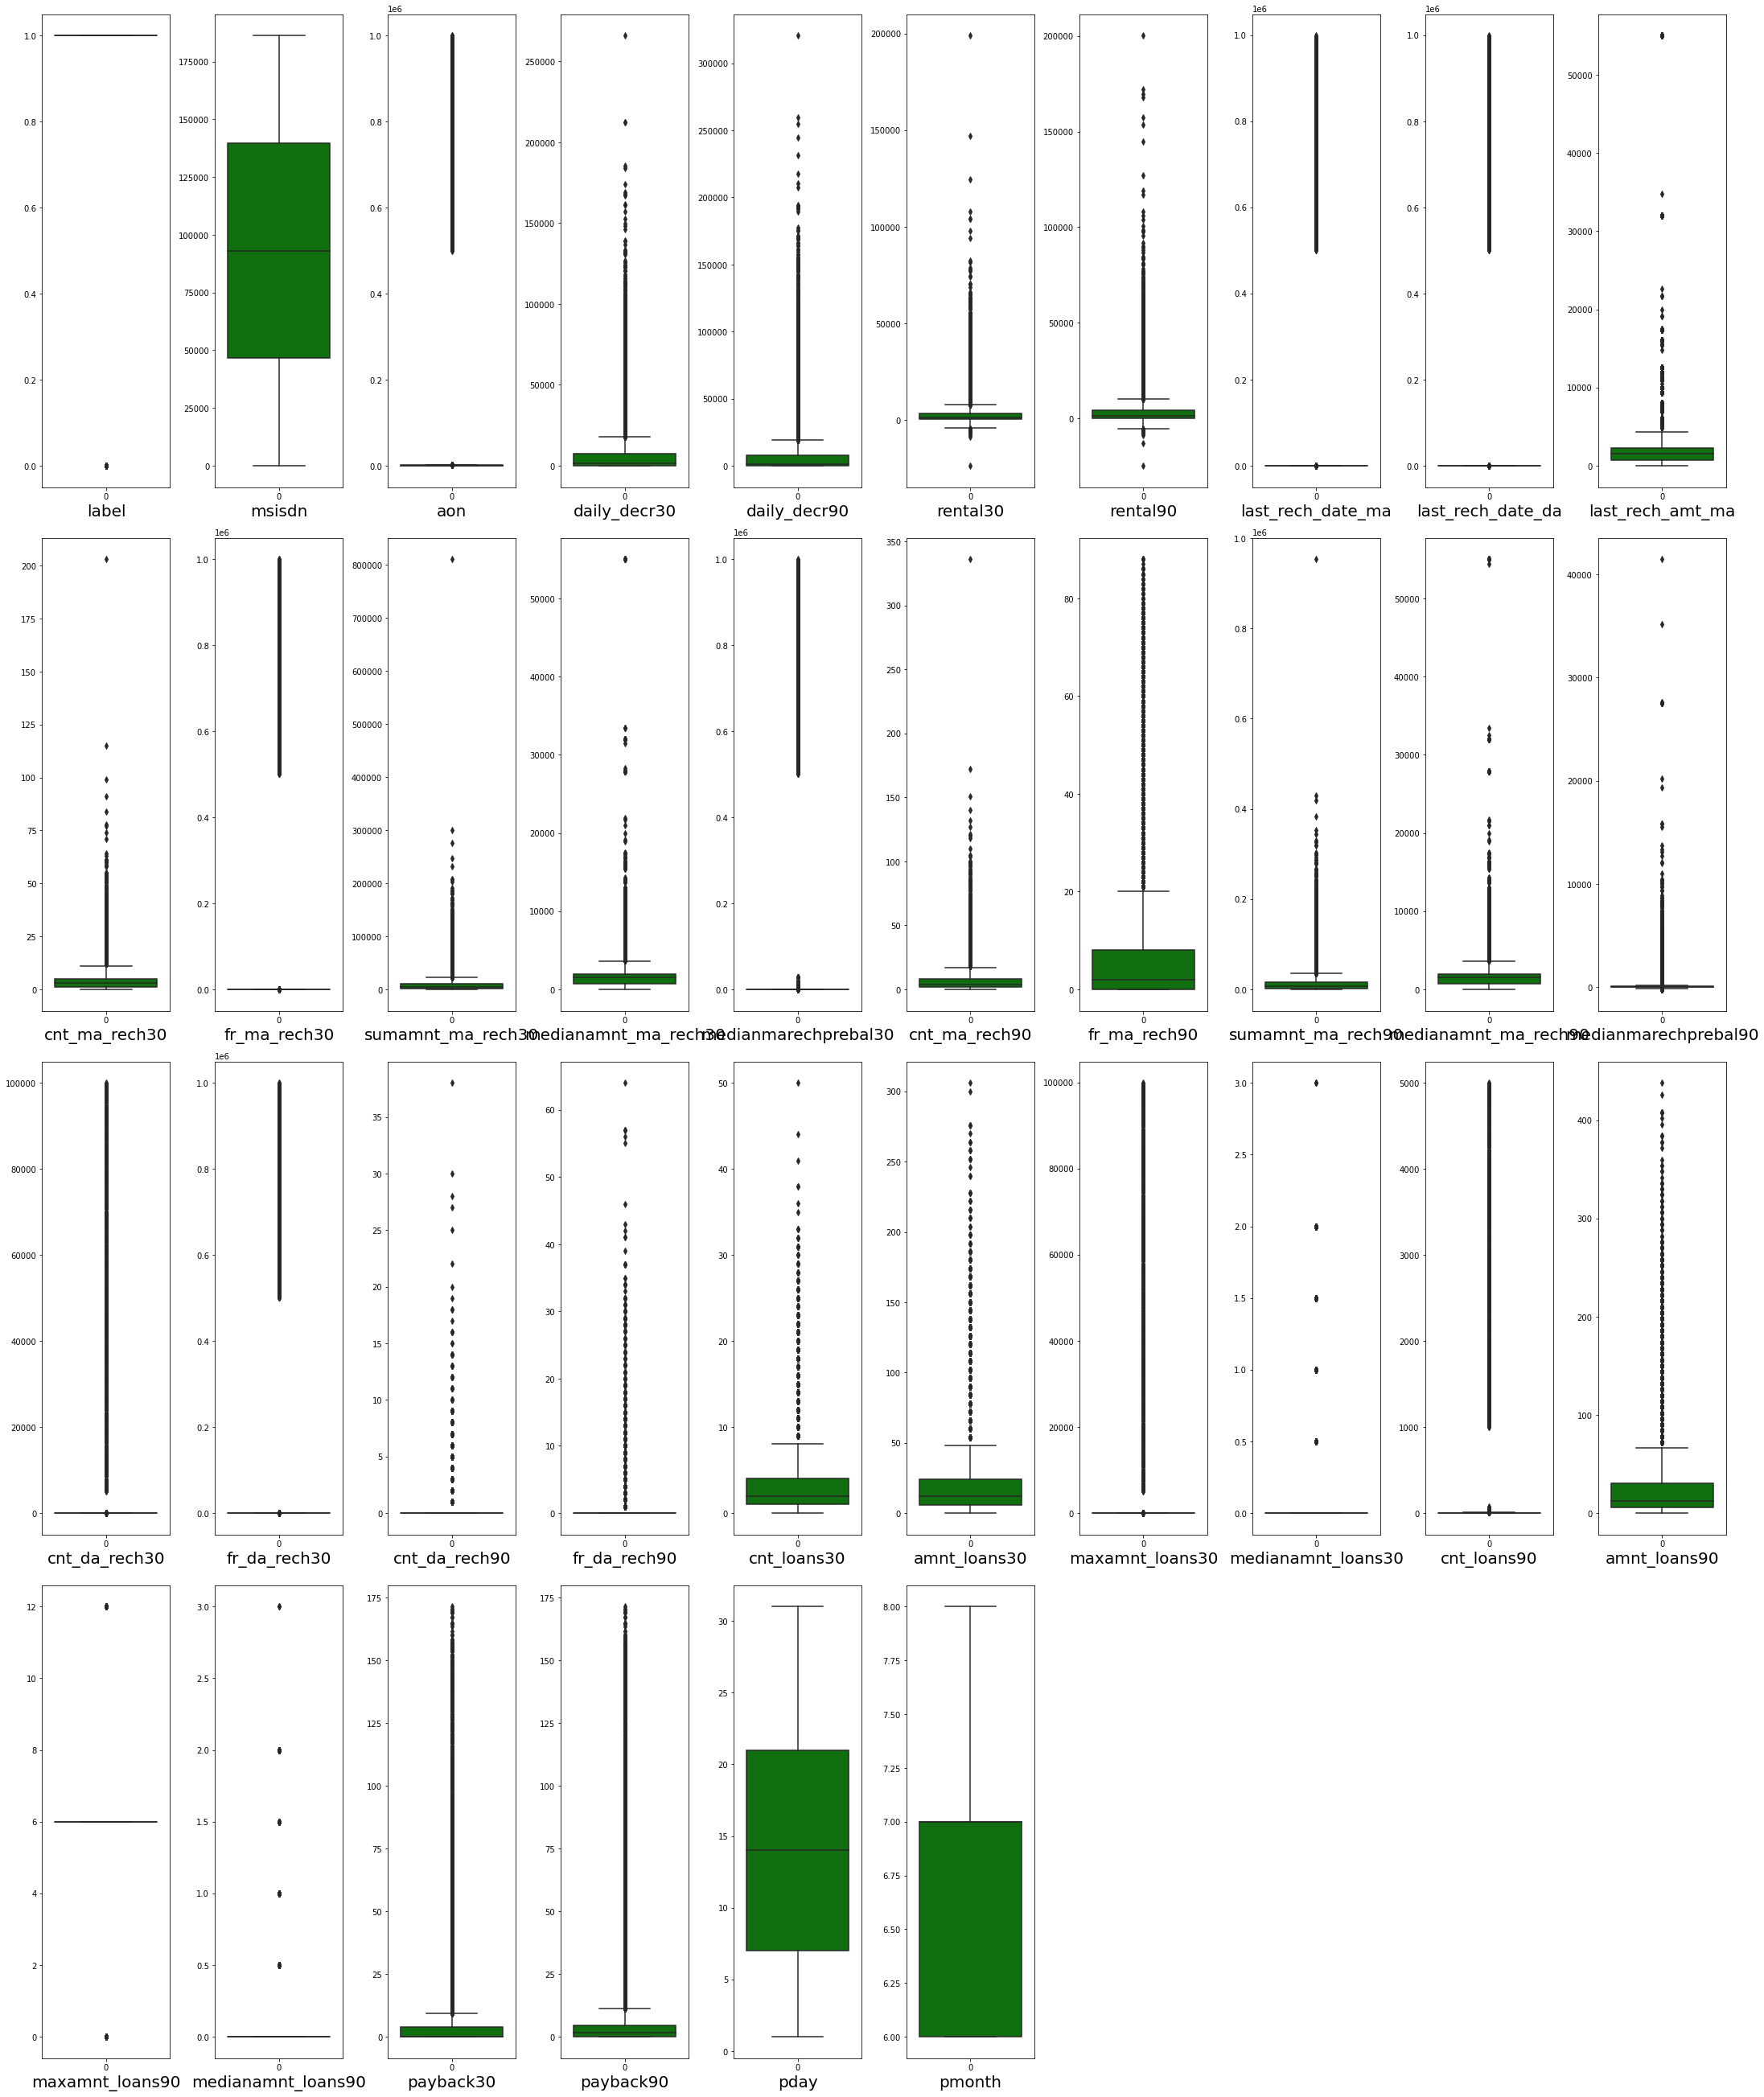

In [27]:
col=df.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

Outliers are present in almost all the continuous features.

## Checking skewness

In [28]:
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392950
daily_decr30             3.946238
daily_decr90             4.252572
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

Skewness exists in all the features except pday,pmonth,label and msisdn.

Let us be sure of skewness by plotting dist plot.

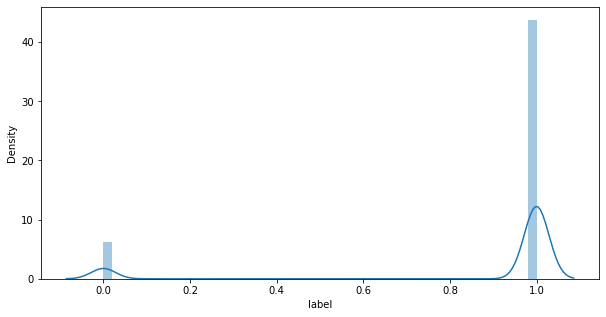

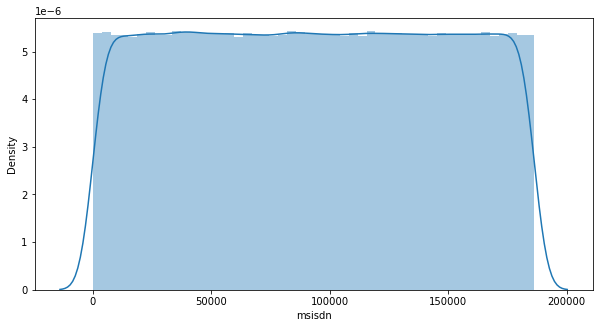

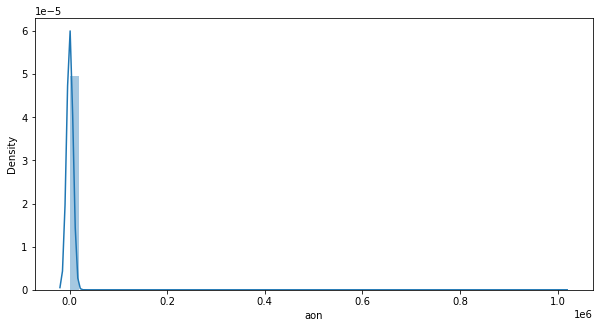

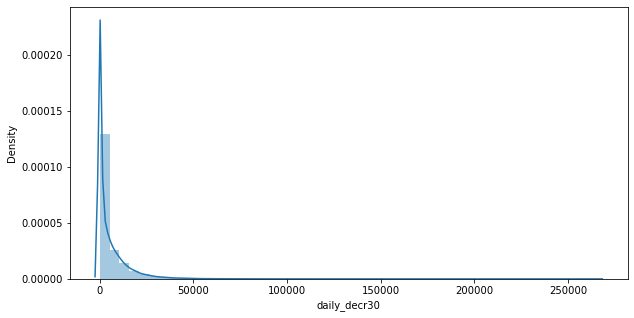

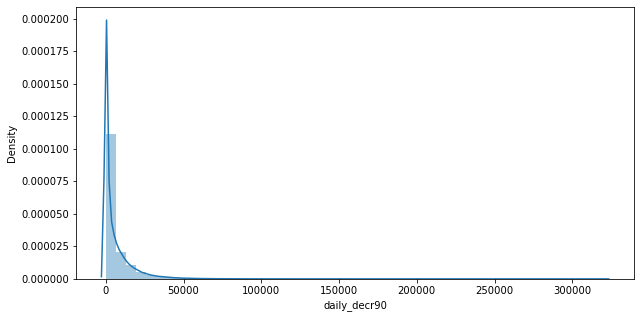

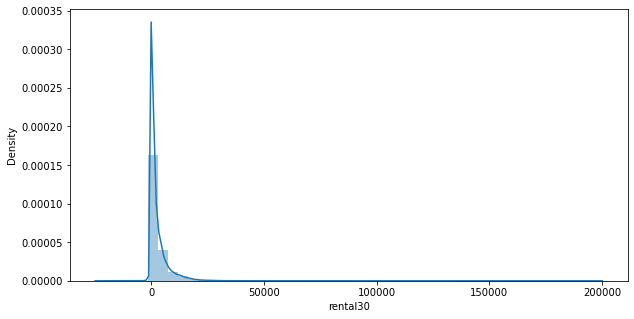

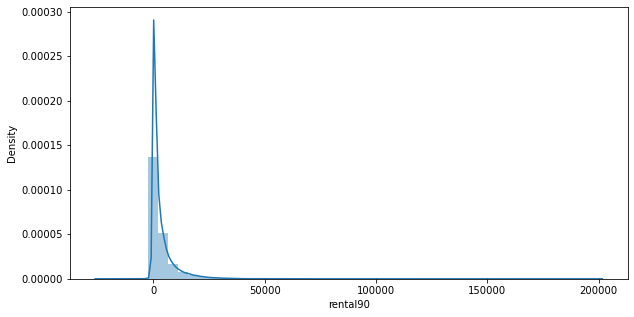

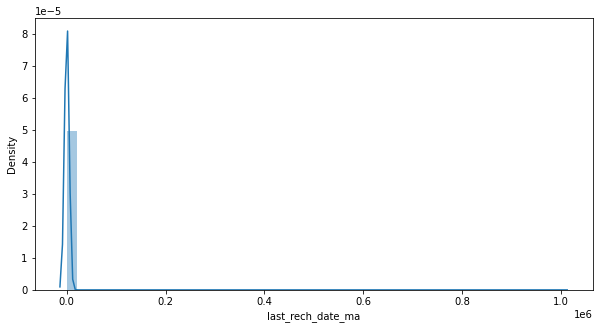

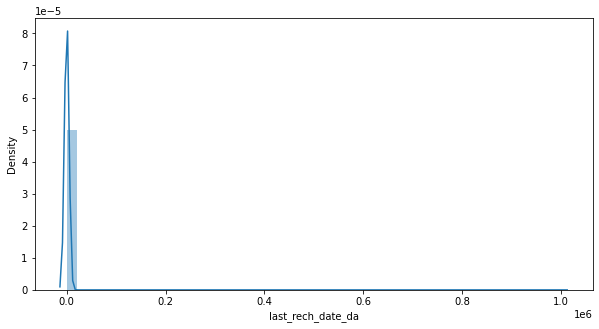

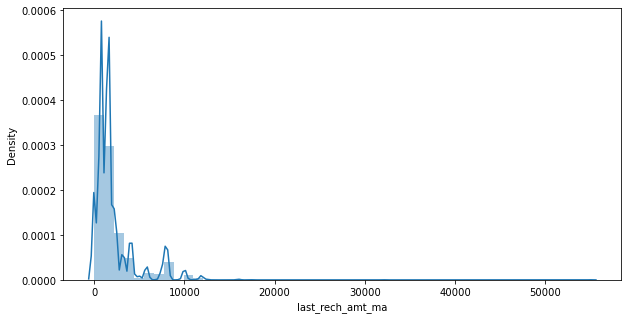

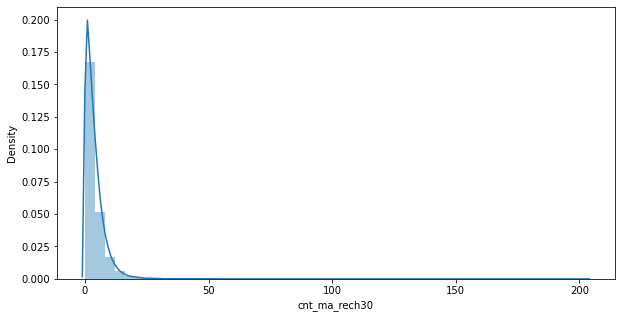

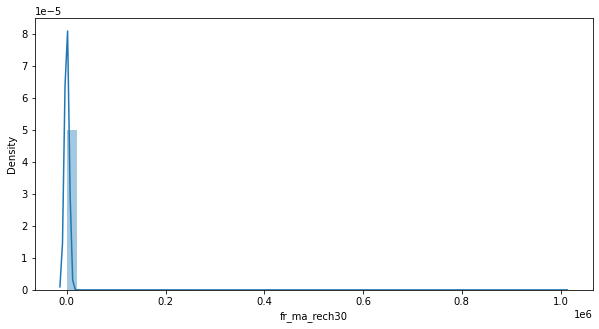

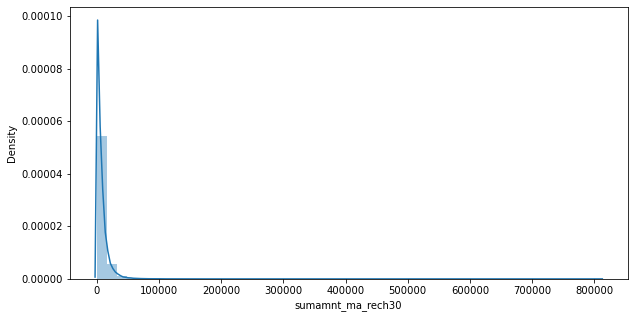

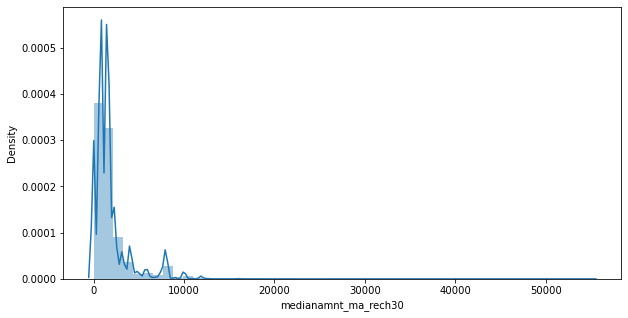

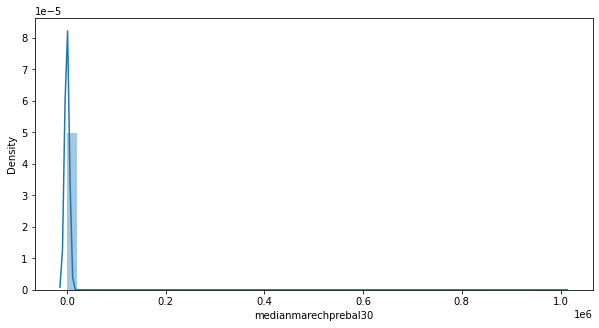

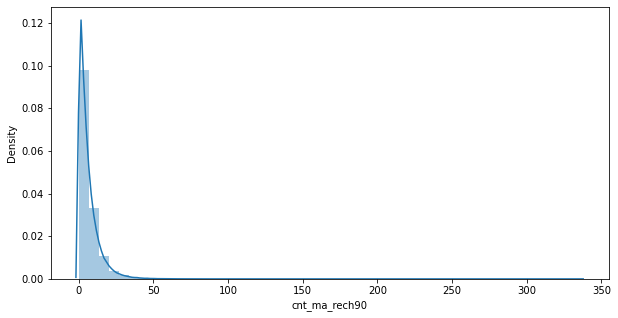

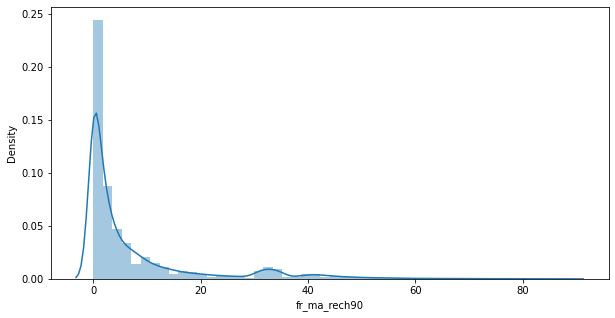

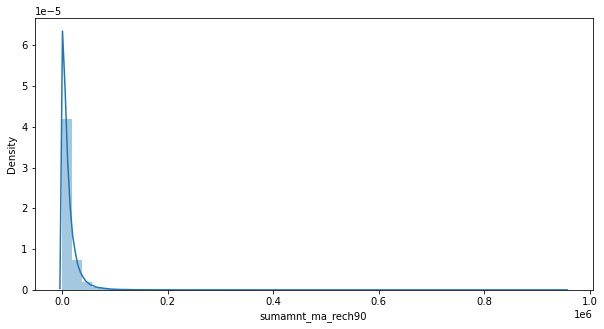

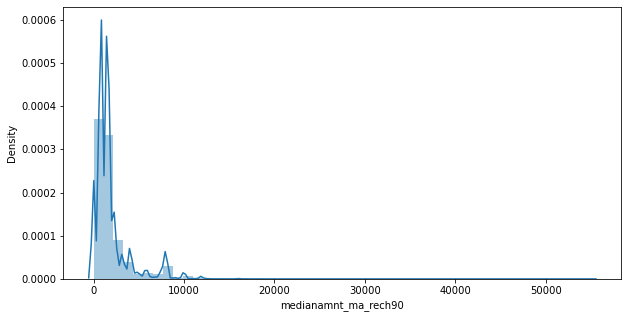

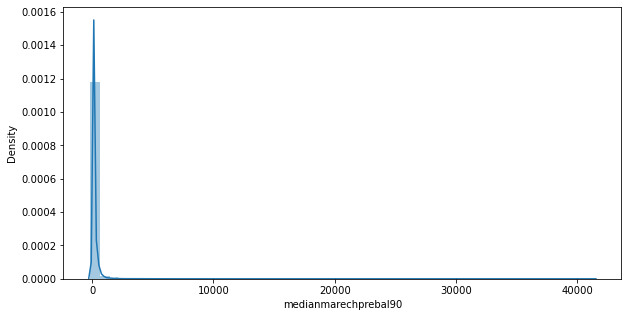

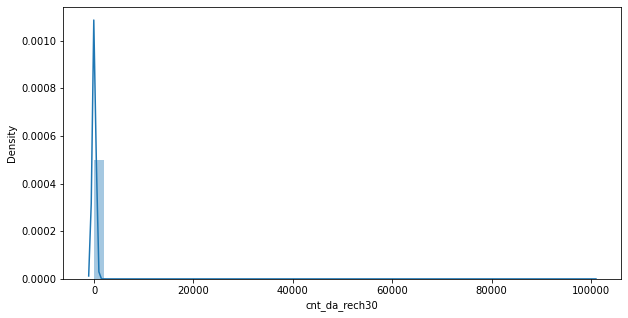

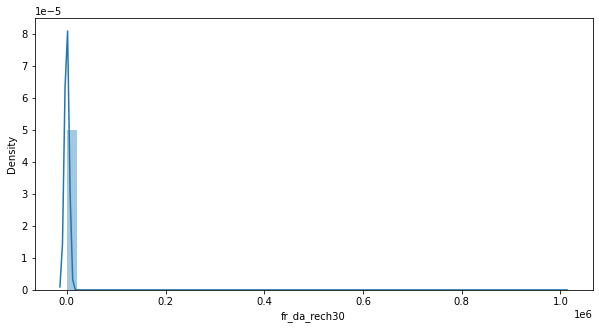

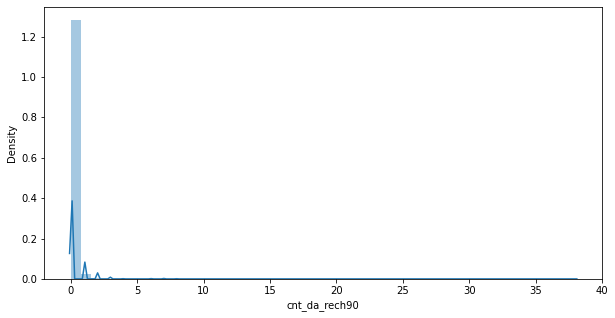

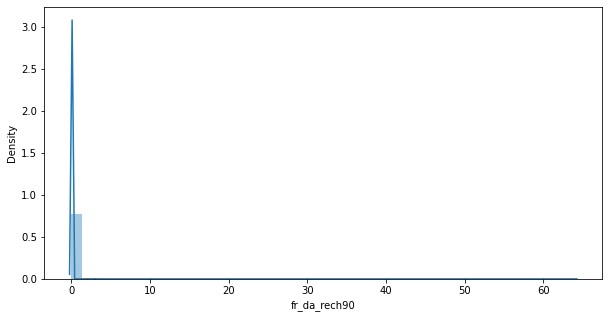

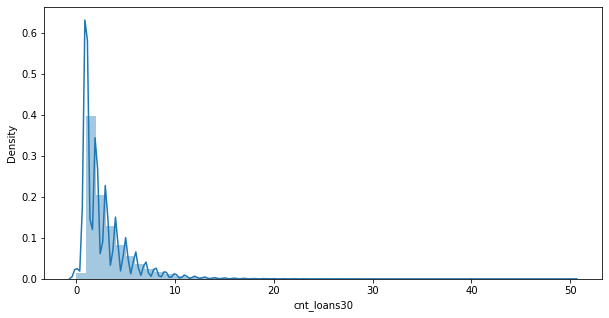

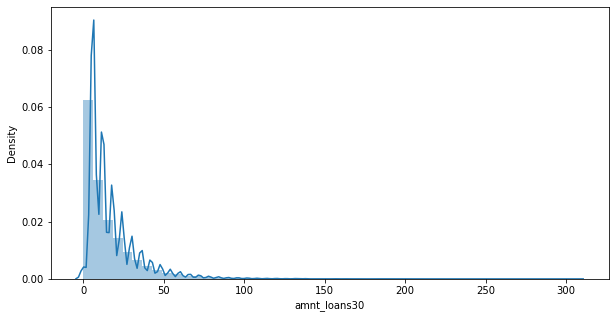

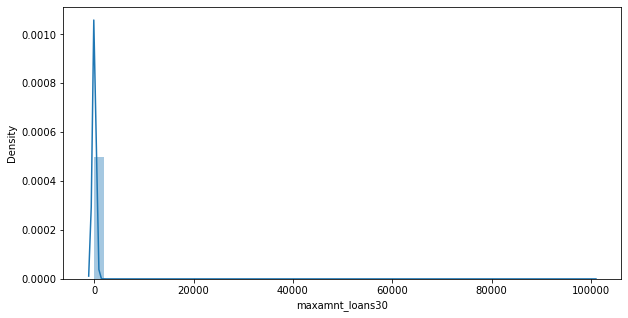

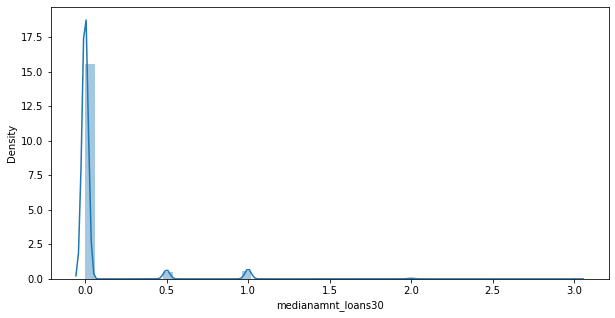

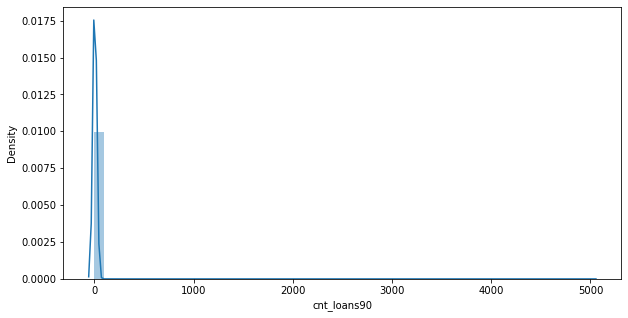

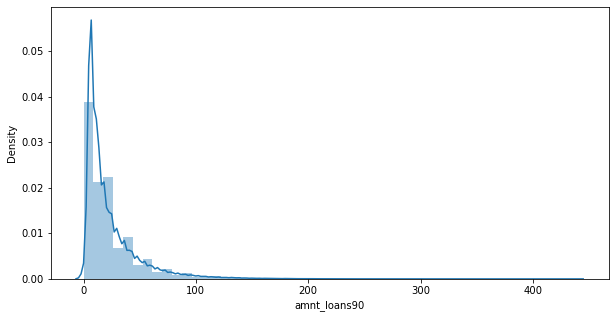

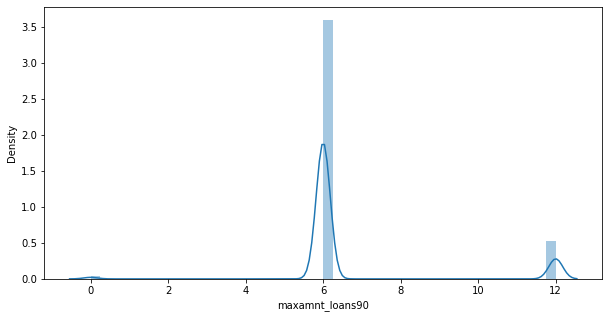

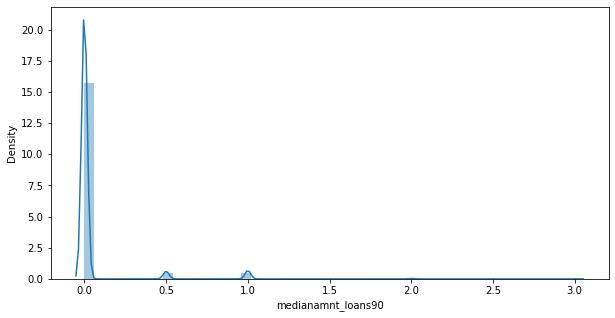

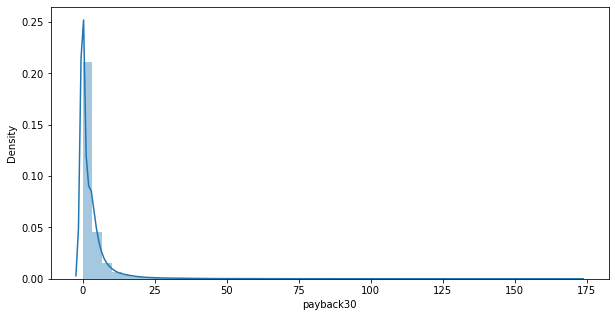

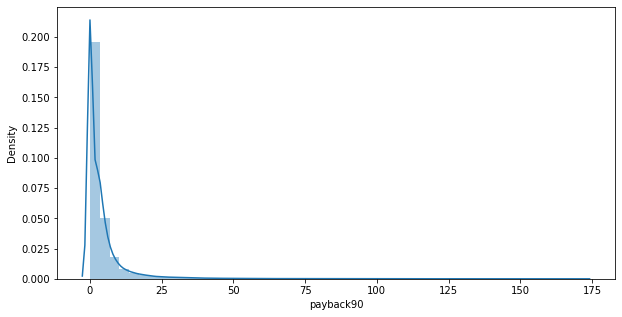

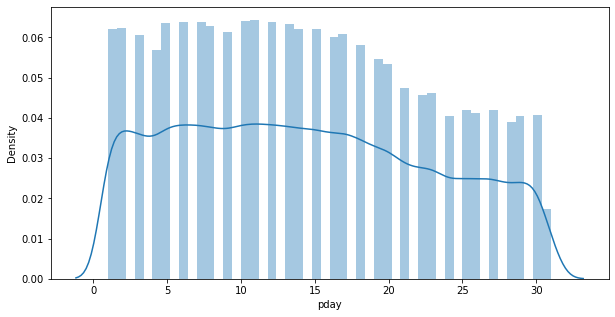

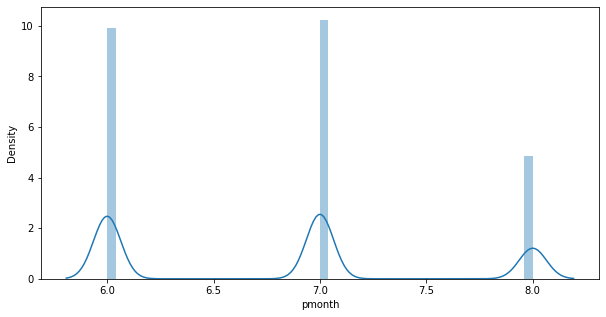

In [29]:
import warnings
warnings.filterwarnings('ignore')
for i in range(len(col)):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col[i]])
    plt.xlabel(col[i],fontsize=10)

Our observation was correct, all the continuous features are skewed.

## Treating multicollinearity

Highest vif score is of  amnt_loans30, it is only 20% related to label and it also has lot of outliers and is also right skewed so we would just drop this feature and check vif score again.

In [23]:
df=df.drop(['amnt_loans30'],axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

          vif              features
0    8.947477                 label
1    3.931082                msisdn
2    1.011569                   aon
3   38.905995          daily_decr30
4   42.368295          daily_decr90
5   18.343252              rental30
6   18.923182              rental90
7    1.004978     last_rech_date_ma
8    1.004934     last_rech_date_da
9    6.040272      last_rech_amt_ma
10  27.759962         cnt_ma_rech30
11   1.004947          fr_ma_rech30
12  20.064883     sumamnt_ma_rech30
13   8.970726  medianamnt_ma_rech30
14   1.005201  medianmarechprebal30
15  28.040738         cnt_ma_rech90
16   1.485185          fr_ma_rech90
17  23.396105     sumamnt_ma_rech90
18  10.151250  medianamnt_ma_rech90
19   1.131944  medianmarechprebal90
20   1.004145         cnt_da_rech30
21   1.004954          fr_da_rech30
22   1.161563         cnt_da_rech90
23   1.143046          fr_da_rech90
24  16.756302           cnt_loans30
25   1.004318       maxamnt_loans30
26   6.379760    medianamnt_

Next highest vif score is of daily_decr90, it is only 17% related with label, it has lot many outliers and is also rightly skewed, so we would drop it and check vif again.

In [24]:
df=df.drop(['daily_decr90'],axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

          vif              features
0    8.947415                 label
1    3.930993                msisdn
2    1.011555                   aon
3    4.075578          daily_decr30
4   17.358337              rental30
5   17.846077              rental90
6    1.004971     last_rech_date_ma
7    1.004932     last_rech_date_da
8    6.040056      last_rech_amt_ma
9   27.671835         cnt_ma_rech30
10   1.004944          fr_ma_rech30
11  18.619405     sumamnt_ma_rech30
12   8.949258  medianamnt_ma_rech30
13   1.005198  medianmarechprebal30
14  27.934636         cnt_ma_rech90
15   1.484411          fr_ma_rech90
16  20.829354     sumamnt_ma_rech90
17  10.123683  medianamnt_ma_rech90
18   1.131718  medianmarechprebal90
19   1.004140         cnt_da_rech30
20   1.004952          fr_da_rech30
21   1.161549         cnt_da_rech90
22   1.143045          fr_da_rech90
23  16.430728           cnt_loans30
24   1.004315       maxamnt_loans30
25   6.379235    medianamnt_loans30
26   1.007189           cnt_

Next highest vif score is of cnt_ma_rech90, it is only 8% related with label, it has lot many outliers and is also rightly skewed, so we would drop it and check vif again.

In [25]:
df=df.drop(['cnt_ma_rech90'],axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

          vif              features
0    8.947321                 label
1    3.930381                msisdn
2    1.011555                   aon
3    4.068921          daily_decr30
4   17.262987              rental30
5   17.723171              rental90
6    1.004969     last_rech_date_ma
7    1.004932     last_rech_date_da
8    6.014125      last_rech_amt_ma
9    7.425537         cnt_ma_rech30
10   1.004944          fr_ma_rech30
11  13.321041     sumamnt_ma_rech30
12   8.815347  medianamnt_ma_rech30
13   1.005193  medianmarechprebal30
14   1.484313          fr_ma_rech90
15  13.524520     sumamnt_ma_rech90
16   9.708289  medianamnt_ma_rech90
17   1.131092  medianmarechprebal90
18   1.004134         cnt_da_rech30
19   1.004941          fr_da_rech30
20   1.161347         cnt_da_rech90
21   1.143044          fr_da_rech90
22  13.863319           cnt_loans30
23   1.004314       maxamnt_loans30
24   6.378294    medianamnt_loans30
25   1.007183           cnt_loans90
26  11.892118          amnt_

In [26]:
df=df.drop(['rental30'],axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

          vif              features
0    8.934698                 label
1    3.930073                msisdn
2    1.011555                   aon
3    4.034735          daily_decr30
4    1.845764              rental90
5    1.004960     last_rech_date_ma
6    1.004924     last_rech_date_da
7    6.013703      last_rech_amt_ma
8    7.423936         cnt_ma_rech30
9    1.004939          fr_ma_rech30
10  13.173964     sumamnt_ma_rech30
11   8.815346  medianamnt_ma_rech30
12   1.005193  medianmarechprebal30
13   1.484078          fr_ma_rech90
14  13.333394     sumamnt_ma_rech90
15   9.704526  medianamnt_ma_rech90
16   1.131008  medianmarechprebal90
17   1.004134         cnt_da_rech30
18   1.004941          fr_da_rech30
19   1.159148         cnt_da_rech90
20   1.142806          fr_da_rech90
21  13.617214           cnt_loans30
22   1.004313       maxamnt_loans30
23   6.376045    medianamnt_loans30
24   1.007180           cnt_loans90
25  11.648068          amnt_loans90
26  13.922355       maxamnt_

In [27]:
df=df.drop(['maxamnt_loans90'],axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
with pd.option_context('display.max_rows',None):
    print(vif)

          vif              features
0    8.932749                 label
1    3.926554                msisdn
2    1.011554                   aon
3    4.022656          daily_decr30
4    1.845705              rental90
5    1.004960     last_rech_date_ma
6    1.004914     last_rech_date_da
7    6.012662      last_rech_amt_ma
8    7.419736         cnt_ma_rech30
9    1.004938          fr_ma_rech30
10  13.063843     sumamnt_ma_rech30
11   8.813691  medianamnt_ma_rech30
12   1.005191  medianmarechprebal30
13   1.483925          fr_ma_rech90
14  13.280797     sumamnt_ma_rech90
15   9.704343  medianamnt_ma_rech90
16   1.130812  medianmarechprebal90
17   1.004130         cnt_da_rech30
18   1.004940          fr_da_rech30
19   1.158851         cnt_da_rech90
20   1.142798          fr_da_rech90
21  13.350385           cnt_loans30
22   1.004310       maxamnt_loans30
23   6.373342    medianamnt_loans30
24   1.007172           cnt_loans90
25  11.161426          amnt_loans90
26   6.320805    medianamnt_

Let us consider good vif range as below 25 so we would continue now.

## Treating Outliers

In [23]:
x=df.drop(['label','msisdn'],axis=1)
z=np.abs(zscore(x))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {131073, 131076, 131080, 131083, 131088, 131091, 21, 22, 131097, 131099, 30, 131104, 36, 37, 131112, 131118, 47, 48, 49, 50, 131121, 53, 55, 131128, 60, 65, 68, 131141, 131146, 131147, 131150, 131155, 84, 131156, 131168, 97, 131173, 131175, 104, 131176, 131177, 107, 131178, 131182, 111, 112, 131184, 114, 118, 119, 121, 131193, 125, 131199, 130, 131202, 131204, 137, 131211, 140, 142, 131215, 146, 150, 131226, 131228, 157, 159, 160, 131232, 167, 131240, 175, 131247, 178, 131256, 131258, 131263, 195, 131269, 131271, 201, 131273, 205, 131277, 208, 131281, 210, 211, 212, 213, 131284, 131285, 131286, 131297, 228, 131301, 233, 131306, 131308, 241, 242, 131316, 131318, 247, 248, 131320, 131322, 251, 252, 253, 131323, 131327, 256, 131329, 258, 131335, 269, 270, 131341, 272, 131345, 274, 131346, 276, 278, 279, 131350, 284, 131356, 131360, 293, 294, 131366, 302, 131378, 308, 309, 131383, 131389, 319, 131395, 329, 131401, 131406, 131407, 131410, 339, 349, 350, 131426, 356, 358, 13

In [34]:
df.shape

(209593, 33)

In [24]:
#Finding data loss
no_row_dropped=47083
loss=(209593-44836)/209593
loss=(1-loss)*100
print("data loss-",loss)

data loss- 21.391935799382612


We cannot drop so many rows as it will affect our data. There will be 21% data loss which we cannot bear. So we will apply transformation technique such as power transform.

## Applying Power transform

In [28]:
x=df.drop(['label'],axis=1)
y=df['label']
cols=x.columns

In [29]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[-0.92855164, -0.45335296,  0.49120127, ...,  1.78396389,
         0.71081705,  0.39752189],
       [ 0.90402732,  0.32702003,  1.10586966, ..., -1.01891695,
        -0.41015086,  1.48013263],
       [-1.07962307,  0.09830583,  0.17892636, ..., -1.01891695,
         0.60996673,  1.48013263],
       ...,
       [-0.63401932,  0.60559055,  1.09476016, ...,  0.75293936,
         1.54675655,  0.39752189],
       [ 0.41109115,  1.02178821,  1.12011456, ...,  1.3378306 ,
         1.18938459,  0.39752189],
       [ 0.57252135,  0.95164579,  0.65431228, ..., -1.01891695,
        -0.81941171,  0.39752189]])

In [30]:
#Converting into dataframe
col=df.drop(['label'],axis=1).columns
df_n=pd.DataFrame(x,columns=col)
df_n

msisdn       aon  daily_decr30  rental90  last_rech_date_ma  \
0      -0.928552 -0.453353      0.491201 -0.568411          -0.278865   
1       0.904027  0.327020      1.105870  0.148082           1.439397   
2      -1.079623  0.098306      0.178926 -0.409047           0.046583   
3       0.290212 -0.553548     -1.120421 -0.597731           1.836418   
4      -1.832104  0.552668     -0.585298 -0.364212           0.279323   
...          ...       ...           ...       ...                ...   
209588 -0.869410 -0.128973     -0.582773 -0.366369          -0.791095   
209589  1.439485  0.652135     -0.981732 -0.229845           0.279323   
209590 -0.634019  0.605591      1.094760  1.022476           0.046583   
209591  0.411091  1.021788      1.120115 -0.389820          -0.278865   
209592  0.572521  0.951646      0.654312 -0.472438           1.163265   

        last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0               -0.181972          0.083417      -0.275617      1.603299   
1               -0.181972          1.501277      -0.799355     -1.128949   
2               -0.181972          0.083417      -0.799355     -1.128949   
3               -0.181972         -0.291052      -1.694157     -1.128949   
4               -0.181972          0.449550       0.992270      0.188872   
...                   ...               ...            ...           ...   
209588          -0.181972          1.051183       0.096120      0.188872   
209589          -0.181972         -0.429509       0.384542     -0.239912   
209590          -0.181972          0.083417       0.620252      1.087596   
209591           5.496407         -0.429509       0.620252      0.649604   
209592          -0.181972          1.870396      -0.275617     -0.239912   

        sumamnt_ma_rech30  ...  cnt_loans30  maxamnt_loans30  \
0               -0.177906  ...     0.011773        -0.101998   
1                0.219811  ...    -0.913019         1.182431   
2               -0.535362  ...    -0.913019        -0.101998   
3               -1.902189  ...     0.011773        -0.101998   
4                1.262660  ...     1.570451        -0.101998   
...                   ...  ...          ...              ...   
209588           0.664001  ...     0.011773        -0.101998   
209589          -0.175310  ...     0.556347        -0.101998   
209590           0.575767  ...     0.924658         1.182431   
209591           0.795555  ...     0.011773         1.182431   
209592           0.552484  ...     0.011773         1.182431   

        medianamnt_loans30  cnt_loans90  amnt_loans90  medianamnt_loans90  \
0                -0.269051    -0.186805     -0.250850           -0.248272   
1                -0.269051    -1.034294     -0.250850           -0.248272   
2                -0.269051    -1.034294     -1.005714           -0.248272   
3                -0.269051    -0.186805     -0.250850           -0.248272   
4                -0.269051     1.180312      1.097886           -0.248272   
...                    ...          ...           ...                 ...   
209588           -0.269051    -0.186805     -0.250850           -0.248272   
209589           -0.269051     0.300689      0.192260           -0.248272   
209590           -0.269051     1.038116      1.358455           -0.248272   
209591           -0.269051     0.300689      0.503740           -0.248272   
209592           -0.269051    -0.186805      0.192260           -0.248272   

        payback30  payback90      pday    pmonth  
0        1.813266   1.783964  0.710817  0.397522  
1       -0.937405  -1.018917 -0.410151  1.480133  
2       -0.937405  -1.018917  0.609967  1.480133  
3       -0.937405  -1.018917 -0.968724 -1.133997  
4        0.639236   0.431438  0.907066 -1.133997  
...           ...        ...       ...       ...  
209588   0.094998  -0.098305  0.402160 -1.133997  
209589   0.094998  -0.098305 -0.161473 -1.133997  
209590   0.974292   0.752939  1.546757  0.397522  
209591  -0.93740

In [31]:
df_n['label']=y

## Data Balancing

In [49]:
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

We can observe that data is not at all balanced so we will balance it by resampling and upsampling it.

In [32]:
from sklearn.utils import resample

NoDefaulter=df_n[df_n.label==0]
YesDefaulter=df_n[df_n.label==1]
No_upsampled=resample(NoDefaulter,replace=True,n_samples=len(YesDefaulter),random_state=27)
df_up=pd.concat([YesDefaulter,No_upsampled])
df_up['label'].value_counts()

1    183431
0    183431
Name: label, dtype: int64

## Standardization

In [33]:
x=df_up.drop(['label'],axis=1)
y=df_up['label']

In [34]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.90618815,  0.39144199,  1.3605475 , ..., -0.74638554,
        -0.42401805,  1.77313759],
       [-1.07582465,  0.18318542,  0.46685554, ..., -0.74638554,
         0.62934025,  1.77313759],
       [ 0.2928796 , -0.41036283, -0.78588132, ..., -0.74638554,
        -1.00079211, -1.04972338],
       ...,
       [-0.32578642,  0.15381845,  0.17373091, ..., -0.74638554,
        -1.97140801,  0.6040832 ],
       [-1.14682068,  0.71412775, -0.43793168, ..., -0.74638554,
         1.50629882, -1.04972338],
       [-0.98572834, -0.7127055 ,  0.62424979, ..., -0.74638554,
         0.93612055,  0.6040832 ]])

## Train test split

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
max_ac=0
randomState=0
lr=LogisticRegression()
for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        if round(accuracy_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(accuracy_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  76.5

Test Accuracy-  76.5


At random state: 5

Train Accuracy-  76.5

Test Accuracy-  76.5


At random state: 9

Train Accuracy-  76.5

Test Accuracy-  76.5


At random state: 12

Train Accuracy-  76.5

Test Accuracy-  76.5


At random state: 16

Train Accuracy-  76.5

Test Accuracy-  76.5


At random state: 18

Train Accuracy-  76.5

Test Accuracy-  76.5


At random state: 19

Train Accuracy-  76.5

Test Accuracy-  76.5


 Best accuracy at random state- 0


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(accuracy_score(y_train,pred_train)*100,1)
test_accuracy=round(accuracy_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 76.5

test accuracy- 76.5


## Cross Validation Score

In [36]:
for i in range(4,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 76.52959433469603

 Accuracy score is- 76.5


At cv- 5

 cross validation score is- 76.52087191421319

 Accuracy score is- 76.5


At cv- 6

 cross validation score is- 76.53232009813843

 Accuracy score is- 76.5


At cv- 7

 cross validation score is- 76.52005413980093

 Accuracy score is- 76.5


At cv- 8

 cross validation score is- 76.53177512650413

 Accuracy score is- 76.5


At cv- 9

 cross validation score is- 76.52795945326477

 Accuracy score is- 76.5


At cv- 10

 cross validation score is- 76.52932306861874

 Accuracy score is- 76.5


At cv- 11

 cross validation score is- 76.53368252812011

 Accuracy score is- 76.5


At cv- 12

 cross validation score is- 76.52577926787374

 Accuracy score is- 76.5


At cv- 13

 cross validation score is- 76.52169030474366

 Accuracy score is- 76.5


At cv- 14

 cross validation score is- 76.53232118635378

 Accuracy score is- 76.5


At cv- 15

 cross validation score is- 76.52768698454972

 Accuracy s

In [54]:
cv_score_best=cross_val_score(lr,x,y,cv=19).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_accuracy)

cross validation score is- 76.52823178089979
accuracy score for linear regression model is- 76.5


## Confusion Matrix

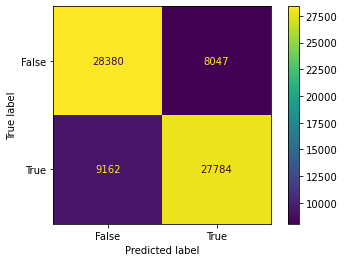

In [38]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

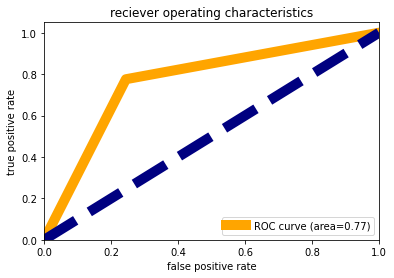

In [39]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [40]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     36427
           1       0.78      0.75      0.76     36946

    accuracy                           0.77     73373
   macro avg       0.77      0.77      0.77     73373
weighted avg       0.77      0.77      0.77     73373



## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    dt_pred_train=dt.predict(x_train)
    dt_pred_test=dt.predict(x_test)
    dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
    dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
    print("\n At random state:",i)
    print("acc train",dt_acc_train)
    print("acc test",dt_acc_test)


 At random state: 0
acc train 100.0
acc test 96.0

 At random state: 1
acc train 100.0
acc test 96.3

 At random state: 2
acc train 100.0
acc test 96.1

 At random state: 3
acc train 100.0
acc test 96.2

 At random state: 4
acc train 100.0
acc test 96.3

 At random state: 5
acc train 100.0
acc test 96.2

 At random state: 6
acc train 100.0
acc test 96.0

 At random state: 7
acc train 100.0
acc test 96.3

 At random state: 8
acc train 100.0
acc test 96.2

 At random state: 9
acc train 100.0
acc test 96.2

 At random state: 10
acc train 100.0
acc test 96.2

 At random state: 11
acc train 100.0
acc test 96.3

 At random state: 12
acc train 100.0
acc test 96.0

 At random state: 13
acc train 100.0
acc test 96.3

 At random state: 14
acc train 100.0
acc test 96.1

 At random state: 15
acc train 100.0
acc test 96.2

 At random state: 16
acc train 100.0
acc test 96.1

 At random state: 17
acc train 100.0
acc test 96.0

 At random state: 18
acc train 100.0
acc test 96.3

 At random state: 19


In [56]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
print("acc train",dt_acc_train)
print("acc test",dt_acc_test)

acc train 100.0
acc test 96.2


## Cross Validation Score

In [43]:
for i in range(4,15):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",dt_acc_test)



At cv- 4

 cross validation score is- 95.97914195371496

 Accuracy score is- 96.3


At cv- 5

 cross validation score is- 96.16449766066566

 Accuracy score is- 96.3


At cv- 6

 cross validation score is- 96.3373147057588

 Accuracy score is- 96.3


At cv- 7

 cross validation score is- 96.41336503391507

 Accuracy score is- 96.3


At cv- 8

 cross validation score is- 96.47469622629734

 Accuracy score is- 96.3


At cv- 9

 cross validation score is- 96.47278795104936

 Accuracy score is- 96.3


At cv- 10

 cross validation score is- 96.4869623951549

 Accuracy score is- 96.3


At cv- 11

 cross validation score is- 96.52893994203744

 Accuracy score is- 96.3


At cv- 12

 cross validation score is- 96.55810629510474

 Accuracy score is- 96.3


At cv- 13

 cross validation score is- 96.54774847468107

 Accuracy score is- 96.3


At cv- 14

 cross validation score is- 96.58754556116452

 Accuracy score is- 96.3


In [57]:
cv_score_best_dt=cross_val_score(dt,x,y,cv=6).mean()*100
print("cross validation score is-",cv_score_best_dt)
print("accuracy score for decision tree classifier model is-",dt_acc_test)

cross validation score is- 96.3032422542748
accuracy score for decision tree classifier model is- 96.2


## Confusion Matrix

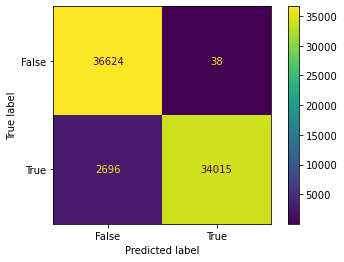

In [45]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

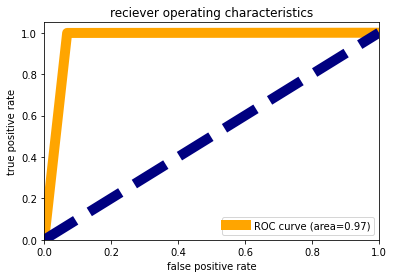

In [46]:
fpr,tpr,thresholds=roc_curve(dt_pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [47]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     36662
           1       1.00      0.93      0.96     36711

    accuracy                           0.96     73373
   macro avg       0.97      0.96      0.96     73373
weighted avg       0.97      0.96      0.96     73373



## Random Forest Classifier 

In [35]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
rf_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  100.0

Test Accuracy-  98.0


## Cross Validation Score

In [36]:
for i in range(4,10):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 4

 cross validation score is- 97.86023060249462

 Accuracy score is- 98.0


At cv- 5

 cross validation score is- 97.99870223884639

 Accuracy score is- 98.0


At cv- 6

 cross validation score is- 98.07339008310485

 Accuracy score is- 98.0


At cv- 7

 cross validation score is- 98.149440627456

 Accuracy score is- 98.0


At cv- 8

 cross validation score is- 98.16715838925563

 Accuracy score is- 98.0


At cv- 9

 cross validation score is- 98.21240673336392

 Accuracy score is- 98.0


In [37]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=6).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest classifier model is-",rf_test_acc)

cross validation score is- 98.08211262137628
accuracy score for random forest classifier model is- 98.0


## Confusion Matrix

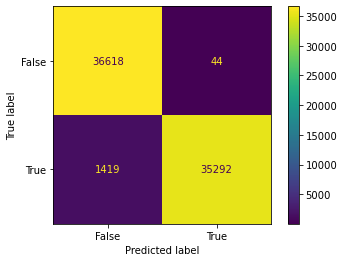

In [38]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

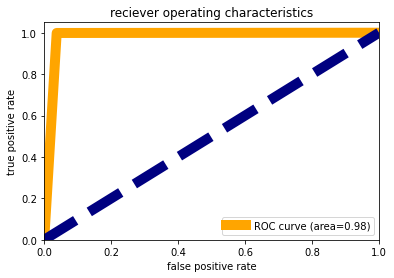

In [39]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [40]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     36662
           1       1.00      0.96      0.98     36711

    accuracy                           0.98     73373
   macro avg       0.98      0.98      0.98     73373
weighted avg       0.98      0.98      0.98     73373



## Knn Classifer

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
knn_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
knn_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",knn_train_acc)
print("\nTest Accuracy- ",knn_test_acc)


Train Accuracy-  92.7

Test Accuracy-  89.6


## Cross Validation score

In [42]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=14).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for Knn classifier model is-",knn_test_acc)

cross validation score is- 90.67196912511059
accuracy score for Knn classifier model is- 89.6


## Confusion Matrix

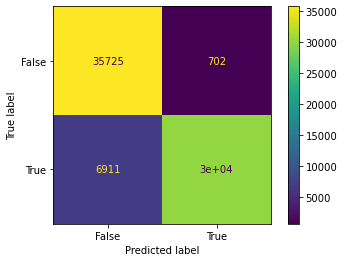

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

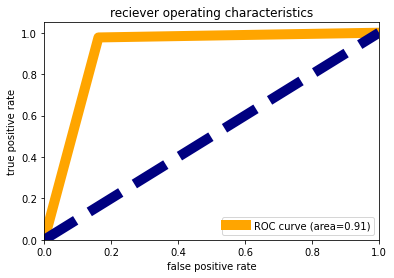

In [44]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [45]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     36427
           1       0.98      0.81      0.89     36946

    accuracy                           0.90     73373
   macro avg       0.91      0.90      0.90     73373
weighted avg       0.91      0.90      0.90     73373



## XGBoost Classifier

In [46]:
from xgboost import XGBClassifier
xgmod=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=38,test_size=0.20)
xgmod.fit(x_train,y_train)
pred_train=xgmod.predict(x_train)
pred_test=xgmod.predict(x_test)
xg_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
xg_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",xg_train_acc)
print("\nTest Accuracy- ",xg_test_acc)


Train Accuracy-  89.8

Test Accuracy-  88.9


## Cross Validation Score

In [47]:
cv_score_best_xg=cross_val_score(xgmod,x,y,cv=65).mean()*100
print("cross validation score is-",cv_score_best_xg)
print("accuracy score for Knn classifier model is-",xg_test_acc)

cross validation score is- 88.91762926001124
accuracy score for Knn classifier model is- 88.9


## Confusion Matrix

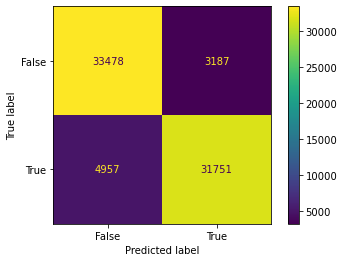

In [48]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

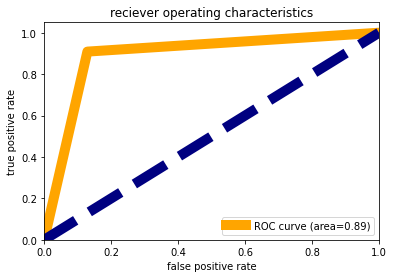

In [49]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [50]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     36665
           1       0.91      0.86      0.89     36708

    accuracy                           0.89     73373
   macro avg       0.89      0.89      0.89     73373
weighted avg       0.89      0.89      0.89     73373



## Model Summary

In [58]:
models=['Logistic Regression','Decision Tree Classifier','Knn Classifier','Random Forest Classifier','XGBoost']
test_acc=[test_accuracy,dt_acc_test,knn_test_acc,rf_test_acc,xg_test_acc]
cv_score=[cv_score_best,cv_score_best_dt,cv_score_best_knn,cv_score_best_rf,cv_score_best_xg]
dfm=pd.DataFrame(list(zip(models,test_acc,cv_score)),columns=['Models','Test Accuracy','CV Score'])
dfm

Models  Test Accuracy   CV Score
0       Logistic Regression           76.5  76.528232
1  Decision Tree Classifier           96.2  96.303242
2            Knn Classifier           89.6  90.671969
3  Random Forest Classifier           98.0  98.082113
4                   XGBoost           88.9  88.917629

There are three models with least difference between accuracy and cv score but the best performing model is random forest as its confusion matrix, auc-roc curve and recall, f1-score is the best among all. Since the model is already giving its best accuracy so we wont apply hyperparameter tuning as its a very big data so we will save our random forest model.

## Model Saving

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))